<div dir=rtl><h1>
&emsp;
&emsp;
&emsp;
&emsp;
&emsp;
<b>
◊§◊®◊ï◊ô◊ô◊ß◊ò ◊ó◊ú◊ß 3
</b>
</h1>

<h4>
◊©◊û◊ï◊™: ◊ê◊®◊ô◊ê◊ú ◊†◊ï◊ë◊ï◊û◊ô◊†◊°◊ß◊ô, ◊ê◊ô◊ú◊ô ◊©◊©◊ï◊ü
</br>
◊™.◊ñ. : 322228974, 322995358
</h4>


</div>

<div dir=rtl>
<h4>
<br>
<br>

◊†◊ò◊¢◊ü ◊ê◊™ ◊°◊ò ◊î◊†◊™◊ï◊†◊ô◊ù ◊ï◊†◊ë◊¶◊¢ ◊ê◊™ ◊î◊ò◊®◊†◊°◊§◊ï◊®◊û◊¶◊ô◊ï◊™ ◊©◊ë◊ô◊¶◊¢◊†◊ï ◊ë◊ó◊ú◊ß ◊î◊®◊ê◊©◊ï◊ü:
</h4>


</div>

In [1]:
import datetime
import statsmodels.api as sm
import scipy.stats as dist
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np, scipy.stats as st
import math
import matplotlib.patches as mpatches
from tabulate import tabulate
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from scipy.linalg import fractional_matrix_power

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("/content/googleplaystore.csv")
df = df.drop(df[(df.Type !='Paid') & (df.Type !='Free')].index)
df = df.dropna()
isFree_Data = df.Type.apply(lambda x: True if x=='Free' else False)
df.insert(7,'IsFree',isFree_Data)
df = df.drop('Type', 1)
df['Last Updated'] = df['Last Updated'].str.replace(',', '')
Last_Updated=pd.to_datetime(df['Last Updated'], format='%B %d %Y')
df = df.drop('Last Updated',axis=1)
df.insert(9,'Last Updated',Last_Updated)
recntly = df['Last Updated'].map(lambda x: True if x > datetime.date(2018,6,1) else False)
df.insert(9,'Recntly Updated',recntly)
df['Installs'] = df['Installs'].map(lambda s: int(s[:-1].replace(',', '')))
df['Reviews'] = df['Reviews'].map(lambda s: int(s))
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  # This is added back by InteractiveShellApp.init_path()


App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  IsFree Price Content Rating  Recntly Updated  \
0      159   19M     10000    True     0       Everyone            False   
1      967   14M    500000    True     0       Everyone            False   
2    87510  8.7M   5000000    True     0       Everyone             True   
3   215644   25M  50000000    True     0           Teen             True   
4      967  2.8M    100000    True     0       Everyone             True   

  Last Updated                     Genres         Current Ver   Android Ver  
0   2018-01-07               Art & Design               1.0.0  4.0.3 and up  
1   2018-01-15  Art & Design;Pretend Play               2.0.0  4.0.3 and up  
2   2018-08-01               Art & Design               1.2.4  4.0.3 and up  
3   2018-06-08               Art & Design  Varies with device    4.2 and up  
4   2018-06-20    Art & Design;Creativity                 1.1    4.4 and up

<div dir=rtl>
<h3>
<b>◊ó◊ú◊ß ◊ê' - ◊®◊ô◊í◊®◊°◊ô◊î ◊ú◊ô◊†◊ê◊®◊ô◊™</b>
</h3>
</div>

<div dir=rtl>
<h4>
1. ◊î◊û◊©◊™◊†◊ô◊ù ◊î◊û◊°◊ë◊ô◊®◊ô◊ù ◊©◊ú◊†◊ï ◊ô◊î◊ô◊ï Rating, Reviews, ◊ï -  Content Rating.
</br>
◊î◊û◊©◊™◊†◊î ◊î◊û◊ï◊°◊ë◊® ◊ô◊î◊ô◊î Installs.
</br>
◊©◊ê◊ú◊™ ◊î◊û◊ó◊ß◊® ◊©◊ú◊†◊ï ◊õ◊ô◊¶◊ì ◊û◊©◊§◊ô◊¢◊ô◊ù ◊ì◊ô◊®◊ï◊í ◊î◊ê◊§◊ú◊ô◊ß◊¶◊ô◊î, ◊û◊°◊§◊® ◊î◊ë◊ô◊ß◊ï◊®◊ï◊™ ◊©◊ô◊© ◊ú◊î, ◊ï◊ì◊ô◊®◊ï◊í ◊î◊™◊ï◊õ◊ü ◊©◊ú◊î, ◊¢◊ú ◊û◊°◊§◊® ◊î◊î◊ï◊®◊ì◊ï◊™ ◊©◊ú◊î.
</br>
◊ê◊†◊ï ◊û◊©◊¢◊®◊ô◊ù ◊õ◊ô ◊ê◊§◊ú◊ô◊ß◊¶◊ô◊ï◊™ ◊ë◊¢◊ú◊ï◊™ ◊ì◊ô◊®◊ï◊í ◊í◊ë◊ï◊î ◊ô◊ï◊™◊® ◊™◊ï◊®◊ì ◊ô◊ï◊™◊® ◊§◊¢◊û◊ô◊ù ◊ï◊õ◊ô ◊í◊ù ◊û◊°◊§◊® ◊®◊ë ◊ô◊ï◊™◊® ◊©◊ú ◊ë◊ô◊ß◊ï◊®◊ï◊™ ◊ô◊í◊®◊ï◊® ◊û◊°◊§◊® ◊î◊ï◊®◊ì◊ï◊™ ◊í◊ë◊ï◊î ◊ô◊ï◊™◊®. ◊ë◊†◊ï◊°◊£, ◊ê◊†◊ï ◊û◊©◊¢◊®◊ô◊ù ◊õ◊ô ◊ì◊ô◊®◊ï◊í ◊™◊ï◊õ◊ü ◊î◊û◊™◊ê◊ô◊ù ◊ú◊ß◊î◊ú ◊®◊ó◊ë ◊ô◊ï◊™◊® ◊ô◊í◊®◊ï◊ù ◊ú◊û◊°◊§◊® ◊î◊ï◊®◊ì◊ï◊™ ◊í◊ë◊ï◊î ◊ô◊ï◊™◊®.
</br>
</br>
◊¢◊ú ◊û◊†◊™ ◊©◊ô◊î◊ô◊î ◊ú◊†◊ï ◊ô◊ï◊™◊® ◊ß◊ú ◊ú◊†◊™◊ó ◊ê◊™ ◊î◊†◊™◊ï◊†◊ô◊ù ◊ú◊î◊®◊ô◊• ◊®◊í◊®◊°◊ô◊î ◊¢◊ú◊ô◊î◊ù ◊†◊ë◊¶◊¢ ◊û◊°◊§◊® ◊ò◊®◊†◊°◊§◊ï◊®◊û◊¶◊ô◊ï◊™ ◊¢◊ú ◊î◊†◊™◊ï◊†◊ô◊ù:  
</h4>
</div>

In [3]:
ln_reg_df = df[['Rating', 'Reviews', 'Content Rating', 'Installs']]
ln_reg_df.head()

Rating  Reviews Content Rating  Installs
0     4.1      159       Everyone     10000
1     3.9      967       Everyone    500000
2     4.7    87510       Everyone   5000000
3     4.5   215644           Teen  50000000
4     4.3      967       Everyone    100000

<div dir=rtl>
<h4>
Content Rating:
</h4>
</div>

<div dir=rtl>
<h4>
◊î◊¢◊®◊õ◊ô◊ù ◊ë◊û◊©◊™◊†◊î ◊ñ◊î ◊î◊ù ◊û◊ó◊®◊ï◊ñ◊ï◊™ ◊ï◊ú◊ê ◊†◊ô◊™◊ü ◊ú◊ô◊ô◊¶◊í ◊ê◊ï◊™◊ù ◊õ◊¢◊®◊ö ◊û◊°◊§◊®◊ô ◊ï◊ú◊õ◊ü ◊ú◊õ◊ú ◊ß◊ò◊í◊ï◊®◊ô◊™ ◊ì◊ô◊®◊ï◊í ◊™◊ï◊õ◊ü ◊†◊ô◊¶◊ï◊® ◊¢◊û◊ï◊ì◊î ◊ë◊ò◊ë◊ú◊î ◊©◊™◊ô◊î◊ô◊î 1 ◊ê◊ù ◊î◊®◊©◊ï◊û◊î ◊î◊í◊ô◊¢◊î ◊û◊ß◊ò◊í◊ï◊®◊ô◊î ◊ñ◊ï ◊ê◊ï 0 ◊ê◊ó◊®◊™:</h4>
</div>

In [4]:
con_rat_vals = ln_reg_df['Content Rating'].unique()

for v in con_rat_vals:
  ln_reg_df[v] = np.where(ln_reg_df['Content Rating'] == v, 1, 0)

ln_reg_df.head()  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Rating  Reviews Content Rating  Installs  Everyone  Teen  Everyone 10+  \
0     4.1      159       Everyone     10000         1     0             0   
1     3.9      967       Everyone    500000         1     0             0   
2     4.7    87510       Everyone   5000000         1     0             0   
3     4.5   215644           Teen  50000000         0     1             0   
4     4.3      967       Everyone    100000         1     0             0   

   Mature 17+  Adults only 18+  Unrated  
0           0                0        0  
1           0                0        0  
2           0                0        0  
3           0                0        0  
4           0                0        0

<div dir=rtl>
<h4>
Installs:
</h4>
</div>

<div dir=rtl>
<h4>
◊î◊¢◊®◊õ◊ô◊ù ◊ë◊û◊©◊™◊†◊î ◊ñ◊î ◊î◊ù ◊ë◊õ◊§◊ï◊ú◊ï◊™ ◊©◊ú 5 (5 ◊î◊ï◊®◊ì◊ï◊™, 100 ◊î◊ï◊®◊ì◊ï◊™, 10000 ◊î◊ï◊®◊ì◊ï◊™ ◊ï◊õ'). ◊¢◊ï◊ë◊ì◊î ◊ñ◊ï ◊í◊ï◊®◊û◊™ ◊ú◊ò◊ï◊ï◊ó ◊î◊¢◊®◊õ◊ô◊ù ◊ë◊û◊©◊™◊†◊î ◊ñ◊î ◊ú◊î◊ô◊ï◊™ ◊û◊ê◊ï◊ì ◊ì◊ú◊ô◊ú, ◊ú◊û◊©◊ú ◊î◊û◊®◊ó◊ß ◊ë◊ô◊ü ◊î◊¢◊®◊ö ◊î◊©◊ë◊ô◊¢◊ô (1000) ◊ú◊¢◊®◊ö ◊î◊©◊û◊ô◊†◊ô (5000) ◊î◊ï◊ê ◊î◊®◊ë◊î ◊ô◊ï◊™◊® ◊í◊ì◊ï◊ú ◊û◊î◊û◊®◊ó◊ß ◊ë◊ô◊ü ◊î◊¢◊®◊ö ◊î◊¢◊®◊ö ◊î◊®◊ê◊©◊ï◊ü (1) ◊ú◊¢◊®◊ö ◊î◊©◊†◊ô (5). ◊¢◊ú ◊û◊†◊™ ◊ú◊î◊ì◊í◊ô◊ù ◊ê◊™ ◊î◊ë◊¢◊ô◊î ◊©◊†◊ï◊¶◊®◊™ ◊û◊î◊¢◊ï◊ë◊ì◊î ◊î◊†"◊ú ◊†◊¶◊ô◊í ◊î◊ô◊°◊ò◊ï◊í◊®◊û◊î ◊©◊ú ◊î◊¢◊®◊õ◊ô◊ù ◊ë◊û◊©◊™◊†◊î:
</h4>
</div>

Histogram Of Installs Values:


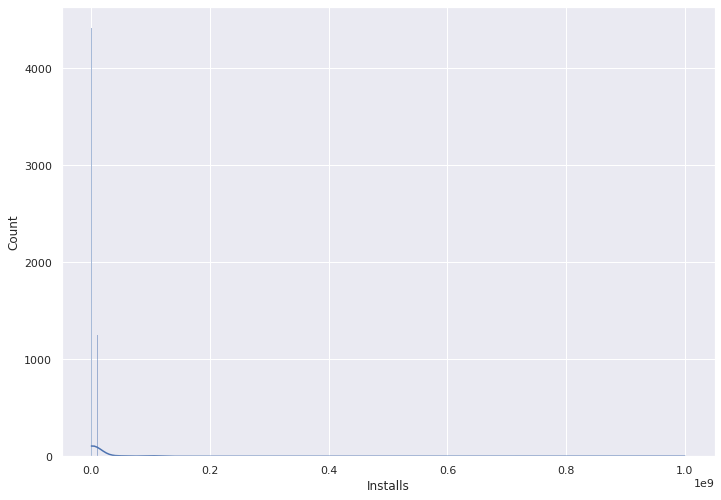

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
print('Histogram Of Installs Values:')
sns.histplot(ln_reg_df['Installs'], kde = True)
plt.show()


<div dir=rtl>
<h4>
◊†◊ô◊™◊ü ◊ú◊®◊ê◊ï◊™ ◊õ◊ô ◊î◊î◊ô◊°◊ò◊ï◊í◊®◊û◊î <b>◊õ◊ú◊ú ◊ú◊ê</b> ◊ê◊ô◊†◊§◊ï◊®◊û◊ò◊ô◊ë◊ô◊™.
</br>
◊¢◊ú ◊û◊†◊™ ◊ú◊î◊™◊û◊ï◊ì◊ì ◊¢◊ù ◊ë◊¢◊ô◊î ◊ñ◊ï, ◊†◊§◊¢◊ô◊ú ◊ê◊™ ◊§◊ï◊†◊ß◊¶◊ô◊î ◊î◊ú◊ï◊í - 10 ◊¢◊ú ◊î◊†◊™◊ï◊†◊ô◊ù ◊ï◊õ◊ö ◊†◊ß◊ë◊ú ◊™◊ï◊ï◊ö ◊¢◊®◊õ◊ô◊ù ◊§◊ó◊ï◊™ ◊ì◊ú◊ô◊ú.
</h4>
</div>

In [6]:
ln_reg_df['Installs'] = ln_reg_df['Installs'].map(lambda x: np.log10(x))
ln_reg_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Rating  Reviews Content Rating  Installs  Everyone  Teen  Everyone 10+  \
0     4.1      159       Everyone   4.00000         1     0             0   
1     3.9      967       Everyone   5.69897         1     0             0   
2     4.7    87510       Everyone   6.69897         1     0             0   
3     4.5   215644           Teen   7.69897         0     1             0   
4     4.3      967       Everyone   5.00000         1     0             0   

   Mature 17+  Adults only 18+  Unrated  
0           0                0        0  
1           0                0        0  
2           0                0        0  
3           0                0        0  
4           0                0        0

<div dir=rtl>
<h4>
Reviews:
</br>
 ◊†◊©◊ô◊ù ◊ú◊ë ◊ú◊ò◊ï◊ï◊ó ◊î◊¢◊®◊õ◊ô◊ù ◊ë◊û◊©◊™◊†◊î ◊ñ◊î:
</h4>
</div>

In [7]:
print('Range Of Values: [', min(ln_reg_df['Reviews'].unique()), ', ', max(ln_reg_df['Reviews'].unique()), ']')

Range Of Values: [ 1 ,  78158306 ]


<div dir=rtl>
<h4>
◊ò◊ï◊ï◊ó ◊î◊¢◊®◊õ◊ô◊ù ◊†◊¢ ◊ë◊ô◊ü 1 ◊ú◊ë◊¢◊®◊ö 80 ◊û◊ô◊ú◊ô◊ï◊ü. ◊û◊°◊ô◊ë◊î ◊ñ◊ï, ◊í◊ù ◊ë◊û◊©◊™◊†◊î ◊ñ◊î ◊ô◊î◊ô◊î ◊û◊ê◊ï◊ì ◊ß◊©◊î ◊ú◊¢◊ë◊ï◊ì ◊¢◊ù ◊¢◊®◊õ◊ô◊ù ◊ê◊ú◊ï. ◊†◊ë◊¶◊¢ ◊ò◊®◊†◊°◊§◊ï◊®◊û◊¶◊ô◊™ ◊ú◊ï◊í - 10 ◊í◊ù ◊õ◊ê◊ü:
</h4>
</div>

In [8]:
ln_reg_df['Reviews'] = ln_reg_df['Reviews'].map(lambda x: np.log10(x))
ln_reg_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Rating   Reviews Content Rating  Installs  Everyone  Teen  Everyone 10+  \
0     4.1  2.201397       Everyone   4.00000         1     0             0   
1     3.9  2.985426       Everyone   5.69897         1     0             0   
2     4.7  4.942058       Everyone   6.69897         1     0             0   
3     4.5  5.333737           Teen   7.69897         0     1             0   
4     4.3  2.985426       Everyone   5.00000         1     0             0   

   Mature 17+  Adults only 18+  Unrated  
0           0                0        0  
1           0                0        0  
2           0                0        0  
3           0                0        0  
4           0                0        0

<div dir=rtl>
<h4>
2. ◊†◊ë◊ó◊® ◊™◊™ ◊û◊ì◊í◊ù ◊ê◊ß◊®◊ê◊ô:
</h4>
</div>

In [9]:
sub_set = ln_reg_df.sample(200, random_state=18)
sub_set.head()

Rating   Reviews Content Rating  Installs  Everyone  Teen  Everyone 10+  \
7499     4.1  1.785330       Everyone   3.00000         1     0             0   
3588     3.7  3.696880       Everyone   6.00000         1     0             0   
4030     4.2  1.301030       Everyone   3.69897         1     0             0   
4719     4.2  1.462398       Everyone   3.69897         1     0             0   
289      4.2  4.667500       Everyone   6.00000         1     0             0   

      Mature 17+  Adults only 18+  Unrated  
7499           0                0        0  
3588           0                0        0  
4030           0                0        0  
4719           0                0        0  
289            0                0        0

<div dir=rtl>
<h4>
3. ◊†◊ô◊™◊ï◊ó ◊ï◊î◊¶◊í◊î ◊©◊ú ◊î◊†◊™◊ï◊†◊ô◊ù:
</h4>
</div>

<div dir=rtl>
<h4>
Installs:
</br>
◊†◊°◊™◊õ◊ú ◊¢◊ú ◊î◊ô◊°◊ò◊ï◊í◊®◊û◊î ◊©◊ú ◊î◊û◊©◊™◊†◊î:
</h4>
</div>

Histogram Of Installs: 


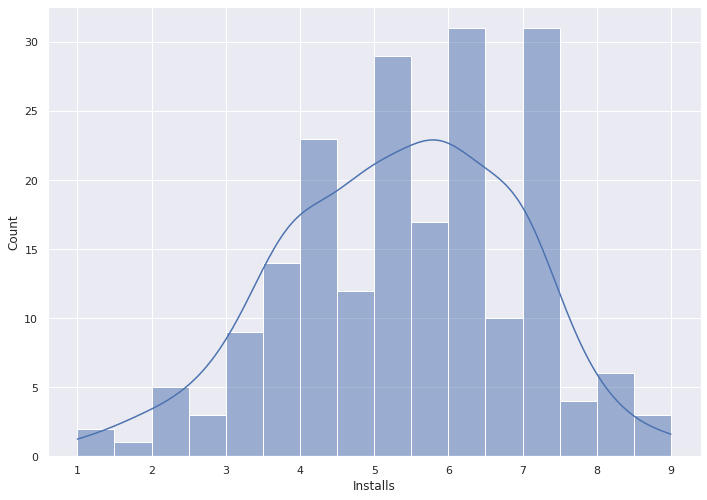

In [10]:
vals = sub_set['Installs']
sns.set(rc={'figure.figsize':(11.7,8.27)})

print('Histogram Of Installs: ')
sns.histplot(vals,binwidth=0.5, kde = True)
plt.show()

<div dir=rtl>
<h4>
◊†◊©◊ô◊ù ◊ú◊ë ◊õ◊ô ◊í◊®◊£ ◊î◊û◊í◊û◊î ◊û◊®◊û◊ñ ◊¢◊ú ◊î◊™◊§◊ú◊í◊ï◊™ ◊†◊ï◊®◊û◊ú◊ô◊™ ◊ê◊ö ◊ô◊© ◊î◊®◊ë◊î ◊¢◊®◊õ◊ô◊ù ◊î◊û◊ß◊ë◊ú◊ô◊ù "◊û◊©◊ß◊ú" ◊†◊û◊ï◊ö ◊û◊û◊î ◊©◊î◊ù ◊ê◊û◊ï◊®◊ô◊ù ◊ú◊ß◊ë◊ú ◊ë◊î◊™◊§◊ú◊í◊ï◊™ ◊†◊ï◊®◊û◊ú◊ô◊™ ◊ê◊û◊ô◊™◊ô◊™. ◊¢◊®◊õ◊ô◊ù ◊ê◊ú◊ï ◊î◊ù ◊î◊¢◊®◊õ◊ô◊ù ◊©◊ê◊ô◊†◊ù ◊©◊ú◊û◊ô◊ù, ◊õ◊ú◊ï◊û◊® ◊î◊¢◊®◊õ◊ô◊ù ◊©◊ë◊°◊ò ◊î◊†◊™◊ï◊†◊ô◊ù ◊î◊û◊ß◊ï◊®◊ô ◊ê◊ô◊†◊ù ◊õ◊§◊ï◊ú◊ï◊™ ◊©◊ú 10 (10 ◊ë◊ó◊ñ◊ß◊™ k).
</br>
◊î◊ë◊¢◊ô◊î ◊î◊ñ◊ï ◊õ◊†◊®◊ê◊î ◊†◊ï◊ë◊¢◊™ ◊û◊î◊ê◊ï◊§◊ü ◊©◊ë◊ï ◊†◊ê◊°◊§◊ï ◊î◊†◊™◊ï◊†◊ô◊ù. ◊î◊†◊™◊ï◊†◊ô◊ù ◊î◊û◊ï◊¶◊í◊ô◊ù ◊î◊ù ◊¢◊ô◊í◊ï◊ú ◊©◊ú ◊û◊°◊§◊® ◊î◊î◊ï◊®◊ì◊ï◊™ ◊î◊ê◊û◊ô◊™◊ô ◊ï◊ú◊õ◊ü ◊õ◊†◊®◊ê◊î ◊©◊î◊¢◊ô◊í◊ï◊ú ◊†◊¢◊©◊î ◊ë◊¶◊ï◊®◊î ◊õ◊ñ◊ï ◊©◊®◊ï◊ë ◊î◊û◊°◊§◊®◊ô◊ù ◊î◊™◊¢◊í◊ú◊ï ◊ú◊õ◊§◊ï◊ú◊ï◊™ ◊©◊ú◊û◊ï◊™ ◊©◊ú 10 ◊ï◊ú◊ê ◊ú◊õ◊§◊ï◊ú◊ï◊™ ◊©◊ú◊û◊ï◊™ ◊©◊ú 5.
</h4>
</div>

<div dir=rtl>
<h4>
Reviews:
</br>
◊†◊°◊™◊õ◊ú ◊¢◊ú ◊î◊ô◊°◊ò◊ï◊í◊®◊û◊î ◊©◊ú ◊î◊†◊™◊ï◊†◊ô◊ù:
</h4>
</div>

Histogram Of Rting: 


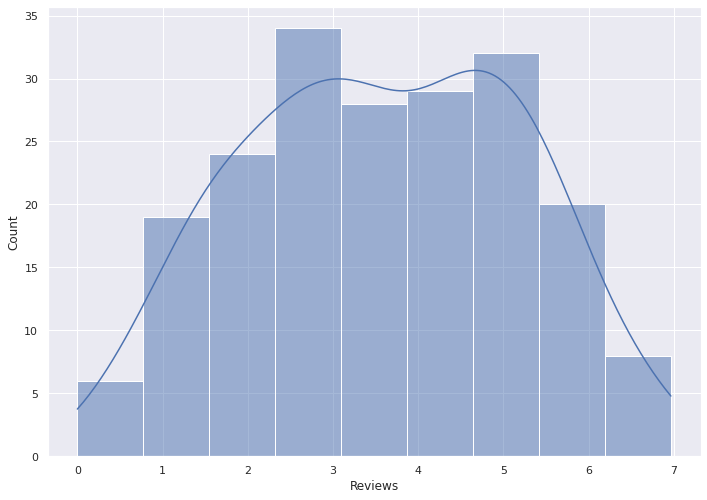

In [11]:
vals = sub_set['Reviews']
sns.set(rc={'figure.figsize':(11.7,8.27)})

print('Histogram Of Rting: ')
sns.histplot(vals, kde = True)
plt.show()

<div dir=rtl>
<h4>
◊î◊î◊ô◊°◊ò◊ï◊í◊®◊û◊î ◊û◊®◊û◊ñ◊™ ◊¢◊ú ◊î◊™◊§◊ú◊í◊ï◊™ ◊†◊ï◊®◊û◊ú◊ô◊™ ◊°◊ô◊û◊ò◊®◊ô◊™.
</h4>
</div>

<div dir=rtl>
<h4>
◊†◊°◊™◊õ◊ú ◊¢◊ú ◊î◊ß◊©◊® ◊ë◊ô◊ü ◊î◊û◊©◊™◊†◊î ◊î◊û◊°◊ë◊ô◊® Reviews ◊ú◊û◊©◊™◊†◊î ◊î◊û◊ï◊°◊ë◊® Installs:
</h4>
</div>

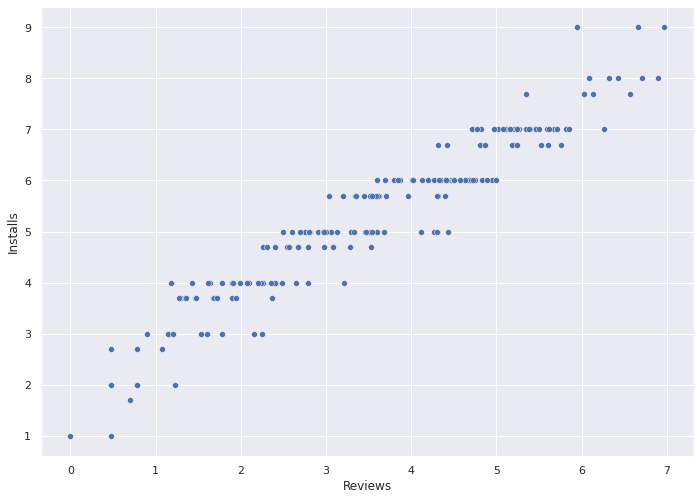

In [12]:
sns.scatterplot(data=sub_set[['Reviews', 'Installs']], x = 'Reviews', y = 'Installs')
plt.show()

<div dir=rtl>
<h4>
◊û◊î◊™◊®◊©◊ô◊ù ◊†◊°◊ô◊ß ◊õ◊ô ◊î◊©◊¢◊®◊™◊ô◊†◊ï ◊û◊ï◊¶◊ì◊ß◊™ ◊ï◊ê◊õ◊ü ◊ô◊© ◊ô◊ó◊° (◊ú◊ô◊†◊ê◊®◊ô) ◊ô◊©◊® ◊ë◊ô◊ü ◊õ◊û◊ï◊™ ◊î◊™◊í◊ï◊ë◊ï◊™ ◊ú◊õ◊û◊ï◊™ ◊î◊î◊ï◊®◊ì◊ï◊™.
</h4>
</div>

<div dir=rtl>
<h4>
Rating:
</br>
◊†◊°◊™◊õ◊ú ◊¢◊ú ◊î◊ô◊°◊ò◊ï◊í◊®◊û◊î ◊©◊ú ◊î◊û◊©◊™◊†◊î:
</h4>
</div>

Histogram Of Rting: 


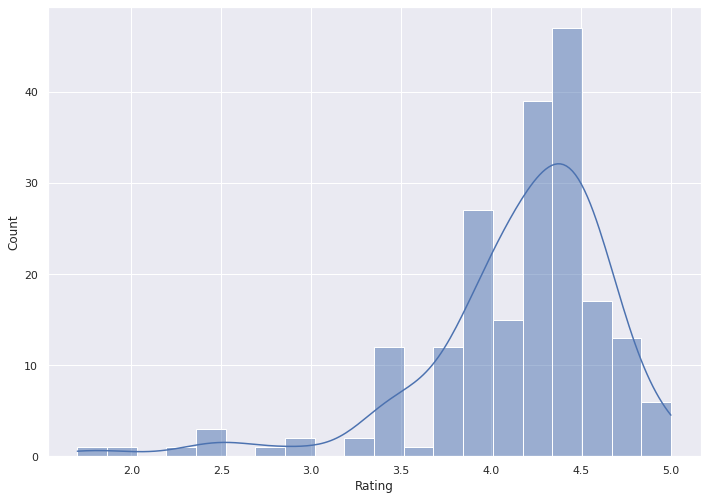

In [13]:
vals = sub_set['Rating']
sns.set(rc={'figure.figsize':(11.7,8.27)})

print('Histogram Of Rting: ')
sns.histplot(vals, kde = True)
plt.show()

<div dir=rtl>
<h4>
◊î◊†◊™◊ï◊†◊ô◊ù ◊û◊ñ◊õ◊ô◊®◊ô◊ù ◊î◊™◊§◊ú◊í◊ï◊™ ◊†◊ï◊®◊û◊ú◊ô◊™ ◊¢◊ù ◊ñ◊†◊ë ◊©◊û◊ê◊ú◊ô ◊õ◊ë◊ì ◊ê◊ö ◊†◊®◊ê◊î ◊õ◊ô ◊ô◊© ◊û◊¢◊ò ◊¢◊®◊õ◊ô◊ù ◊ó◊®◊ô◊í◊ô◊ù (outlyers) "◊î◊û◊ï◊©◊õ◊ô◊ù" ◊ê◊™ ◊î◊î◊™◊§◊ú◊í◊ï◊™ ◊©◊û◊ê◊ú◊î.
</br>
◊†◊ô◊™◊ü ◊ú◊®◊ê◊ï◊™ ◊¢◊ï◊ë◊ì◊î ◊ñ◊ï ◊í◊ù ◊ë◊í◊®◊ö ◊î - boxplot ◊î◊ë◊ê:
</h4>
</div>

Box Plot Of Rting: 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


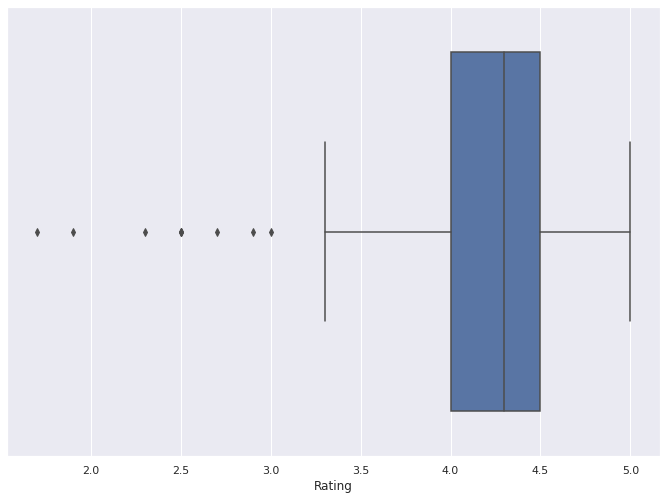

In [14]:
print('Box Plot Of Rting: ')
sns.boxplot(vals)
plt.show()

<div dir=rtl>
<h4>
◊†◊°◊™◊õ◊ú ◊¢◊ú ◊î◊ô◊°◊ò◊ï◊í◊®◊û◊™ ◊î◊û◊©◊™◊†◊î ◊ï◊í◊®◊£ ◊î - boxplot ◊©◊ú◊ï ◊ú◊ú◊ê ◊î◊¢◊®◊õ◊ô◊ù ◊î◊ó◊®◊ô◊í◊ô◊ù:
</h4>
</div>

Histogram Of Rting: 


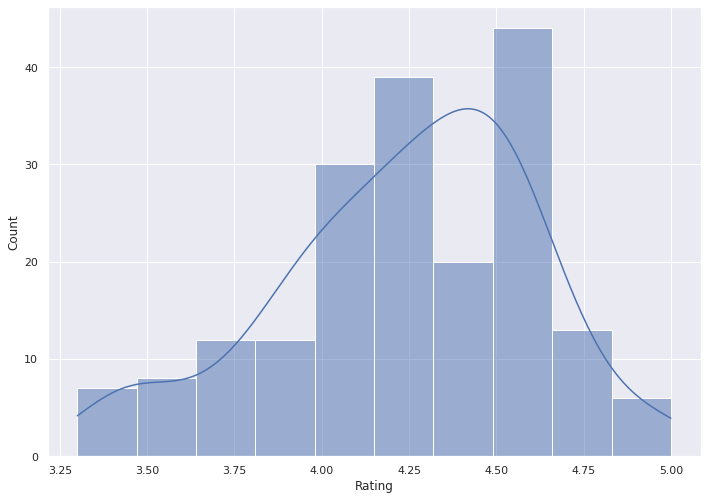

In [15]:
vals = sub_set[sub_set['Rating'] > 3]['Rating']
print('Histogram Of Rting: ')
sns.histplot(vals, kde = True)
plt.show()

Box Plot Of Rting: 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


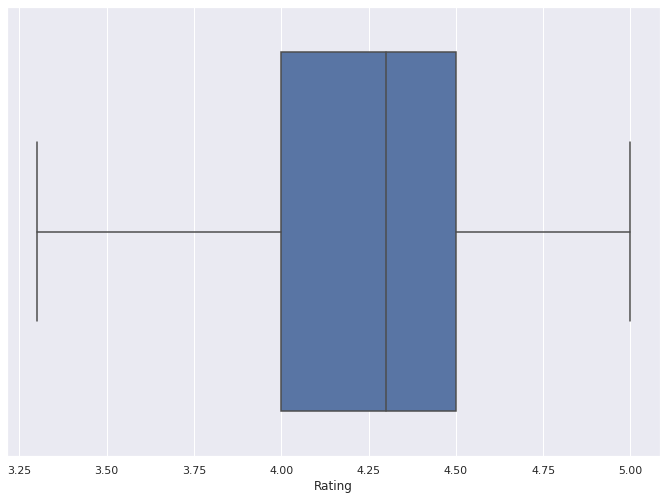

In [16]:
print('Box Plot Of Rting: ')
sns.boxplot(vals)
plt.show()

<div dir=rtl>
<h4>
◊õ◊ê◊©◊® ◊û◊™◊¢◊ú◊û◊ô◊ù ◊û◊î◊¢◊®◊õ◊ô◊ù ◊î◊ó◊®◊ô◊í◊ô◊ù ◊ß◊ô◊ë◊ú◊†◊ï ◊õ◊ô ◊î◊†◊™◊ï◊†◊ô◊ù ◊ê◊õ◊ü ◊†◊®◊ê◊ô◊ù ◊õ◊û◊™◊§◊ú◊í◊ô◊ù ◊†◊ï◊®◊û◊ú◊ô◊™.
</br>
◊î◊¢◊®◊õ◊ô◊ù ◊î◊ó◊®◊ô◊í◊ô◊ù ◊î◊ù ◊¢◊®◊õ◊ô◊ù ◊î◊ß◊ò◊†◊ô◊ù ◊©◊ï◊ï◊ô◊ù ◊ú - 3. ◊î◊û◊©◊û◊¢◊ï◊™ ◊î◊ô◊ê ◊©◊î"◊û◊°◊î" ◊î◊í◊ì◊ï◊ú◊î ◊©◊ú ◊î◊ê◊§◊ú◊ô◊ß◊¶◊ô◊ï◊™ ◊û◊ß◊ë◊ú◊ï◊™ ◊ì◊ô◊®◊ï◊í◊ô◊ù ◊î◊í◊ì◊ï◊ú◊ô◊ù ◊û - 3.
</h4>
</div>

<div dir=rtl>
<h4>
◊†◊°◊™◊õ◊ú ◊¢◊ú ◊î◊ß◊©◊® ◊ë◊ô◊ü ◊î◊û◊©◊™◊†◊î ◊î◊û◊°◊ë◊ô◊® Rating ◊ú◊û◊©◊™◊†◊î ◊î◊û◊ï◊°◊ë◊® Installs:
</h4>
</div>

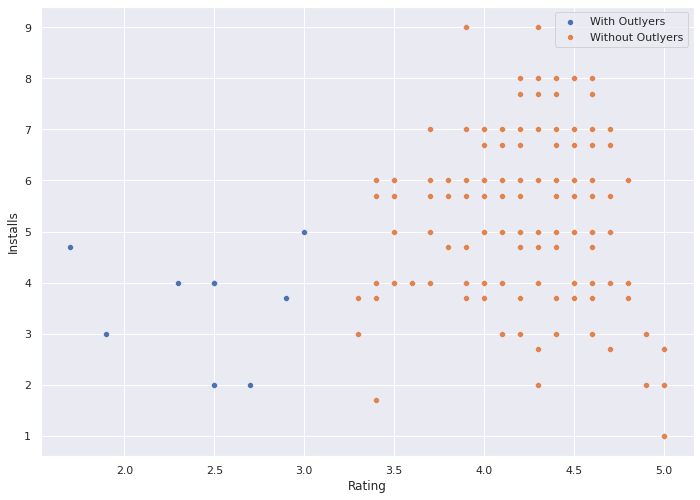

In [17]:
sns.scatterplot(data=sub_set[['Rating', 'Installs']], x = 'Rating', y = 'Installs', label='With Outlyers')

plot_df = sub_set[['Rating', 'Installs']]
plot_df = plot_df.drop(plot_df[(plot_df.Rating <= 3)].index)
sns.scatterplot(data=plot_df, x = 'Rating', y = 'Installs', label='Without Outlyers')
plt.legend()
plt.show()

<div dir=rtl>
<h4>
◊†◊ô◊™◊ü ◊ú◊®◊ê◊ï◊™ ◊õ◊ô ◊û◊©◊™◊ß◊§◊™ ◊™◊û◊ï◊†◊î ◊©◊ï◊†◊î ◊û◊î◊©◊¢◊®◊™◊ô◊†◊ï ◊î◊î◊™◊ó◊ú◊™◊ô◊™ ◊ú◊í◊ë◊ô ◊î◊©◊§◊¢◊™ ◊î - Rating ◊¢◊ú ◊î - Installs. ◊®◊ê◊©◊ô◊™ ◊†◊©◊ô◊ù ◊ú◊ë ◊õ◊ô ◊¢◊ë◊ï◊® ◊¢◊®◊õ◊ô◊ù ◊î◊ß◊ò◊†◊ô◊ù ◊û - 3 (◊©◊ê◊ï◊™◊ù ◊î◊í◊ì◊®◊†◊ï ◊õ -Outlyers) ◊î◊í◊®◊£ ◊ú◊ê ◊ê◊ô◊†◊§◊ï◊®◊û◊ò◊ô◊ë◊ô (◊õ◊†◊®◊ê◊î ◊û◊õ◊ô◊ï◊ï◊ü ◊©◊ê◊ô◊ü ◊û◊°◊§◊ô◊ß ◊†◊™◊ï◊†◊ô◊ù). ◊¢◊ë◊ï◊® ◊©◊ê◊® ◊î◊¢◊®◊õ◊ô◊ù ◊†◊®◊ê◊î ◊õ◊ô ◊ê◊ô◊ü ◊ß◊©◊® ◊õ◊ú◊ú ◊ë◊ô◊ü ◊ì◊ô◊®◊ï◊í ◊î◊ê◊§◊ú◊ô◊ß◊¶◊ô◊î ◊ú◊û◊°◊§◊® ◊î◊î◊ï◊®◊ì◊ï◊™.
</h4>
</div>

<div dir=rtl>
<h4>
Content Rating:
</br>
◊†◊°◊™◊õ◊ú ◊¢◊ú ◊ò◊ë◊ú◊î ◊©◊ú ◊î◊û◊©◊™◊†◊î:
</h4>
</div>

In [18]:
con_rat_vals = ln_reg_df['Content Rating'].unique()

sum_list = ['Total']
for c in con_rat_vals:
 sum_list.append(sub_set[c].sum())

per_list = ['Percentage']
per_list += [str((x/len(sub_set))*100) + '%' for x in sum_list[1:]] 

print(tabulate([sum_list, per_list], headers=[' '] + con_rat_vals))


             Everyone     Teen     Everyone 10+     Mature 17+     Adults only 18+     Unrated
----------  -----------  -------  ---------------  -------------  ------------------  ----------
Total       168          15       4                13             0                   0
Percentage  84.0%        7.5%     2.0%             6.5%           0.0%                0.0%


<div dir=rtl>
<h4>
◊†◊ô◊™◊ü ◊ú◊®◊ê◊ï◊™ ◊õ◊ô ◊î◊®◊ï◊ë ◊î◊í◊ì◊ï◊ú ◊©◊ú ◊î◊ê◊§◊ú◊ô◊ß◊¶◊ô◊ï◊™ ◊î◊ù ◊ë◊¢◊ú◊ï◊™ ◊ì◊ô◊®◊ï◊í ◊™◊ï◊õ◊ü ◊©◊ú Everyone ◊¢◊ù 84 ◊ê◊ó◊ï◊ñ ◊û◊î◊ê◊§◊ú◊ô◊ß◊¶◊ô◊ï◊™. ◊ë◊†◊ï◊°◊£, ◊¢◊ß◊ë ◊î◊ê◊ó◊ï◊ñ ◊î◊ß◊ò◊ü ◊©◊ú ◊ê◊§◊ú◊ô◊ß◊¶◊ô◊ï◊™ ◊ë◊¢◊ú◊ï◊™ ◊ì◊ô◊®◊ï◊í ◊™◊ï◊õ◊ü Adults only +18 ◊ï - Unrated ,
◊ë◊û◊ì◊í◊ù ◊©◊ú◊†◊ï ◊ê◊ô◊ü ◊õ◊ú◊ú ◊ê◊§◊ú◊ô◊ß◊¶◊ô◊ï◊™ ◊î◊û◊í◊ô◊¢◊ï◊™ ◊û◊ì◊ô◊®◊ï◊í ◊™◊ï◊õ◊ü ◊ñ◊î, ◊ï◊ë◊§◊®◊ò ◊ê◊ù ◊ê◊õ◊ü ◊ô◊© ◊î◊©◊§◊¢◊î ◊ú◊ì◊ô◊®◊ï◊í ◊î◊™◊ï◊õ◊ü ◊¢◊ú ◊õ◊û◊ï◊™ ◊î◊î◊ï◊®◊ì◊ï◊™, ◊û◊ï◊ì◊ú ◊î◊®◊ô◊í◊®◊°◊ô◊î ◊©◊†◊ë◊†◊î ◊ú◊ê ◊ô◊¶◊ô◊ú◊ó "◊ú◊™◊§◊ï◊°" ◊ê◊™ ◊î◊î◊©◊§◊¢◊î ◊©◊ú ◊ì◊ô◊®◊ï◊í◊ô ◊™◊ï◊õ◊ü ◊ê◊ú◊ï.
</h4>
</div>

<div dir=rtl>
<h4>
◊†◊ë◊ì◊ï◊ß ◊ê◊™ ◊î◊©◊§◊¢◊™ ◊ì◊ô◊®◊ï◊í ◊î◊™◊ï◊õ◊ü ◊¢◊ú ◊û◊°◊§◊® ◊î◊î◊ï◊®◊ì◊ï◊™ ◊¢◊ú ◊ô◊ì◊ô ◊í◊®◊£ violin ◊ê◊©◊® ◊û◊¶◊ô◊í ◊ß◊ô◊®◊ï◊ë ◊ú◊î◊™◊§◊ú◊í◊ï◊™ ◊î◊†◊™◊ï◊†◊ô◊ù (◊ß◊ô◊®◊ï◊ë ◊®◊¶◊ô◊£ ◊ú◊î◊ô◊°◊ò◊ï◊í◊®◊û◊™ ◊î◊†◊™◊ï◊†◊ô◊ù) ◊ú◊§◊ô ◊î◊ß◊ò◊ï◊í◊ï◊®◊ô◊ï◊™ ◊î◊©◊ï◊†◊ï◊™:
</h4>
</div>

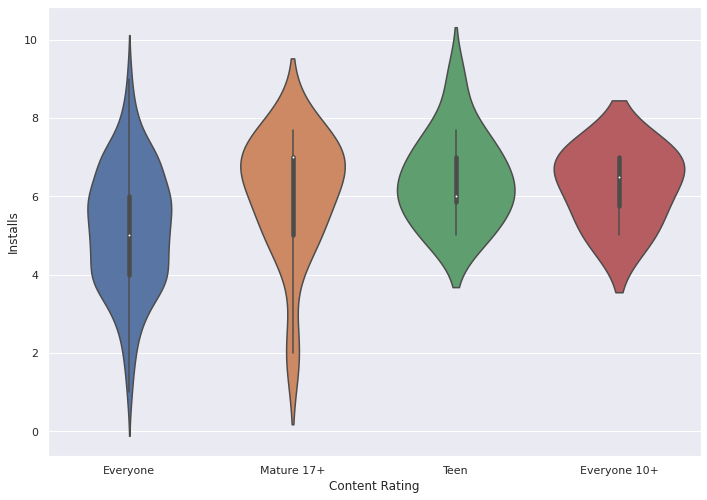

In [19]:
sns.violinplot(x="Content Rating", y="Installs", data=sub_set)
plt.show()  

<div dir=rtl>
<h4>
◊®◊ê◊©◊ô◊™, ◊†◊ô◊™◊ü ◊ú◊®◊ê◊ï◊™ ◊õ◊ô ◊¢◊ë◊ï◊® ◊î◊ß◊ò◊í◊ï◊®◊ï◊ô◊ï◊™ Teen, Everyone +10 ◊ï - Mature +17, ◊î◊û◊û◊ï◊¶◊¢◊ô◊ù ◊ß◊®◊ï◊ë◊ô◊ù (◊ë◊ô◊ü 6 ◊ú - 7) ◊ï◊î◊î◊™◊§◊ú◊í◊ï◊™ ◊û◊®◊ï◊õ◊ñ◊™ ◊ë◊ê◊ï◊™◊ï ◊ê◊ï◊§◊ü ◊û◊°◊ë◊ô◊ë ◊ú◊û◊û◊ï◊¶◊ê, ◊§◊®◊ò ◊ú◊ß◊ò◊í◊ï◊®◊ô◊î Mature +17 ◊©◊ë◊î ◊†◊®◊ê◊î ◊õ◊ô ◊ô◊© ◊û◊°◊§◊® ◊¢◊®◊õ◊ô◊ù ◊ó◊®◊ô◊í◊ô◊ù ◊ë◊ï◊ì◊ì◊ô◊ù ◊î"◊û◊ï◊©◊õ◊ô◊ù" ◊ê◊™ ◊î◊î◊™◊§◊ú◊í◊ï◊™ ◊õ◊ú◊§◊ô ◊û◊ò◊î.
◊¢◊ë◊ï◊® ◊î◊ß◊ò◊í◊ï◊®◊ô◊î Everyone ◊†◊®◊ê◊î ◊õ◊ô ◊î◊û◊û◊ï◊¶◊¢ ◊ô◊ó◊°◊ô◊™ ◊†◊û◊ï◊ö ◊û◊©◊ê◊® ◊î◊ß◊ò◊í◊ï◊®◊ô◊ï◊™ ◊ï◊õ◊ô ◊î◊î◊™◊§◊ú◊í◊ï◊™ ◊§◊ó◊ï◊™ ◊û◊®◊ï◊õ◊ñ◊™ ◊°◊ë◊ô◊ë◊ï. ◊†◊©◊ô◊ù ◊ú◊ë ◊õ◊ô ◊™◊ï◊¶◊ê◊î ◊ñ◊ï ◊ô◊õ◊ï◊ú◊î ◊ú◊†◊ë◊ï◊¢ ◊û◊í◊ì◊ú◊ô ◊î◊û◊ì◊í◊ù ◊î◊©◊ï◊†◊ô◊ù ◊©◊õ◊ü, ◊õ◊§◊ô ◊©◊î◊®◊ê◊†◊ï ◊ß◊ï◊ì◊ù, ◊û◊®◊ë◊ô◊™ ◊î◊ê◊§◊ú◊ô◊ß◊¶◊ô◊ï◊™ ◊ë◊û◊ì◊í◊ù ◊î◊í◊ô◊¢◊ï ◊û◊ß◊ò◊í◊ï◊®◊ô◊î ◊ñ◊ï.
</h4>
</div>

<div dir=rtl>
<h4>
4. ◊†◊ë◊¶◊¢ ◊®◊ô◊í◊®◊°◊ô◊î ◊ú◊ô◊†◊ê◊®◊ô◊™ ◊ï◊†◊û◊¶◊ê ◊ê◊™ ◊¢◊®◊õ◊ô ◊î◊ê◊ï◊û◊ì◊ü ◊ú◊ë◊ò◊ê:
</h4>
</div>

In [20]:
x_vals = sub_set.drop(['Content Rating', 'Installs'], 1).to_numpy()

reg = linear_model.LinearRegression()
reg.fit(x_vals, sub_set['Installs'].to_numpy())
beta_cova = reg.intercept_ + reg.coef_

con_rat_vals = ln_reg_df['Content Rating'].unique()
print(tabulate([['Effect'] + list(beta_cova)], headers=[' ', 'Bias', 'Rating', 'Reviews'] + list(con_rat_vals)))

           Bias    Rating    Reviews    Everyone     Teen    Everyone 10+    Mature 17+    Adults only 18+
------  -------  --------  ---------  ----------  -------  --------------  ------------  -----------------
Effect  2.47141   3.64796    2.84548     2.84237  2.41025         2.67144       2.69238            2.69238


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<div dir=rtl>
<h4>
◊î◊î◊©◊§◊¢◊î ◊©◊ú ◊¢◊ú◊ô◊ô◊î ◊ë◊ô◊ó◊ô◊ì◊î ◊ê◊ó◊™ ◊©◊ú ◊ì◊ô◊®◊ï◊í ◊î◊ê◊§◊ú◊ô◊ß◊¶◊ô◊î ◊¢◊ú ◊û◊°◊§◊® ◊î◊î◊ï◊®◊ì◊ï◊™ ◊î◊ô◊ê ◊î◊©◊§◊¢◊î ◊©◊ú 3.6 ◊ô◊ó◊ô◊ì◊ï◊™.
◊î◊©◊§◊¢◊î ◊©◊ú ◊ô◊ó◊ô◊ì◊î ◊ê◊ó◊™ ◊ë◊û◊°◊§◊® ◊î◊ë◊ô◊ß◊®◊ï◊™ ◊î◊ô◊ê ◊î◊©◊§◊¢◊î ◊ó◊ô◊ï◊ë◊ô◊™ ◊©◊ú 2.85. 
</br>
◊î◊©◊§◊¢◊™ ◊ê◊ô◊ë◊® ◊î◊ò◊ô◊ô◊î ◊î◊ô◊ê ◊©◊ú 2.47 ◊ô◊ó◊ô◊ì◊ï◊™ ◊¢◊ú ◊û◊°◊§◊® ◊î◊î◊ï◊®◊ì◊ï◊™.
</br>
◊†◊®◊ê◊î ◊õ◊ô ◊§◊®◊ò ◊ú◊©◊ï◊†◊ô ◊ß◊ò◊ü (◊©◊ú 0.2 ◊ô◊ó◊ô◊ì◊ï◊™), ◊î◊©◊§◊¢◊™ ◊ì◊ô◊®◊ï◊í ◊î◊™◊ï◊õ◊ü ◊¢◊ú ◊û◊°◊§◊® ◊î◊î◊ï◊®◊ì◊ï◊™ ◊î◊ï◊ê ◊ñ◊î◊î. ◊û◊õ◊ô◊ï◊ï◊ü ◊©◊ú◊õ◊ú ◊ê◊§◊ú◊ô◊ß◊¶◊ô◊î ◊ô◊© ◊ë◊ì◊ô◊ï◊ß ◊ì◊ô◊®◊ï◊í ◊™◊ï◊õ◊ü ◊ê◊ó◊ì, ◊ê◊ô◊ë◊® ◊ñ◊î ◊ì◊ï◊û◊î ◊ú◊ê◊ô◊ë◊® ◊î◊î◊ò◊ô◊î ◊©◊õ◊ü ◊õ◊ú ◊ê◊§◊ú◊ô◊ß◊¶◊ô◊î ◊û◊ß◊ë◊ú◊™ ◊™◊ï◊°◊§◊™ ◊ì◊ï◊û◊î ◊ú◊û◊°◊§◊® ◊î◊î◊ï◊®◊ì◊ï◊™ ◊ú◊ú◊ê ◊™◊ú◊ï◊™ ◊ë◊ì◊®◊í◊™ ◊î◊ì◊ô◊®◊ï◊í ◊û◊û◊†◊î ◊î◊í◊ô◊¢◊î.
</h4>
</div>

<div dir=rtl>
<h4>
5. ◊†◊ó◊©◊ë ◊ê◊™ ◊ò◊ë◊ú◊™ ◊î - ANOVA, ◊î - R ◊ë◊®◊ô◊ë◊ï◊¢ ◊ï◊ê◊™ ◊î - R ◊ë◊®◊ô◊ë◊ï◊¢ adj:
</h4>
</div>

In [21]:
y = sub_set['Installs'].to_numpy()
y_cova = reg.predict(x_vals)

ssr = sum([(yi - np.mean(y))**2 for yi in y_cova])
sse = sum([x**2 for x in y - y_cova])
sst = sum([(yi - np.mean(y))**2 for yi in y])
p = len(beta_cova) + 1
n = len(y)

list_to_tab = []
list_to_tab.append(['Regression', ssr, p, ssr/(p - 1)])
list_to_tab.append(['Residuals', sse, n - p, sse/(n - p)])
list_to_tab.append(['Total', sst, n - 1, sst/(n - 1)])
print(tabulate(list_to_tab, headers=['Source', 'ùë∫ùë∫', 'ùíÖùíá', 'ùë¥ùë∫']))

r_sqwr = ssr/sst
r_sqwr_adj = 1 - ((n - 1)/(n - p))*(1 - r_sqwr)
print()
print('R^2 = ', r_sqwr)
print('R^2_adj = ', r_sqwr_adj)

Source            ùë∫ùë∫    ùíÖùíá         ùë¥ùë∫
----------  --------  ----  ---------
Regression  451.044      9  56.3805
Residuals    37.6273   191   0.197002
Total       488.672    199   2.45564

R^2 =  0.9230007889274192
R^2_adj =  0.9197756910814472


<div dir=rtl>
<h4>
◊†◊ë◊¶◊¢ ◊û◊ë◊ó◊ü F:
</h4>
</div>

In [22]:
f = (ssr/(p - 1))/(sse/(n - p))
print('R.R. = ', dist.f.ppf(0.95, p, n - p))

print('F value = ', f)

R.R. =  1.9291629235741017
F value =  286.19311196409353


<div dir=rtl>
<h4>
F > R.R. ◊ï◊ú◊õ◊ü ◊†◊ì◊ó◊î ◊ê◊™ ◊î◊©◊¢◊®◊™ ◊î◊ê◊§◊°, ◊õ◊ú◊ï◊û◊® ◊™◊ï◊¶◊ê◊™ ◊î◊û◊ë◊ó◊ü ◊î◊ô◊ê ◊©◊ê◊õ◊ü ◊ô◊© ◊°◊ô◊ë◊î ◊ú◊î◊ê◊û◊ô◊ü ◊õ◊ô ◊î◊ß◊©◊® ◊î◊ú◊ô◊†◊ê◊®◊ô ◊©◊ê◊†◊ï ◊û◊†◊ô◊ó◊ô◊ù ◊û◊™◊ß◊ô◊ô◊ù.
</h4>
</div>

<div dir=rtl>
<h4>
6. ◊†◊ó◊©◊ë ◊®◊ï◊ï◊ó ◊°◊û◊ö ◊ú◊û◊ß◊ì◊ô◊ù:
</h4>
</div>

In [23]:
i = 0
x_vals = sub_set.drop(['Content Rating', 'Installs'], 1).to_numpy()
x_vals = np.array([np.insert(x, 1, 0) for x in x_vals])
c = np.dot(x_vals.T, x_vals)
c = np.linalg.pinv(c)

eps_sigma =  sum([x**2 for x in y - y_cova])/(len(y) - p)

for b in beta_cova:
  print('Confidence Interval For Coefficient Number ', i, ': [', b - dist.norm.ppf(0.95, 0, 1)*eps_sigma*c[i][i], ', ',  b + dist.norm.ppf(0.95, 0, 1)*c[i][i], ']')
  i += 1

Confidence Interval For Coefficient Number  0 : [ 2.4651107222210547 ,  2.5033890074317413 ]
Confidence Interval For Coefficient Number  1 : [ 3.6479610966437144 ,  3.6479610966437144 ]
Confidence Interval For Coefficient Number  2 : [ 2.8447588483981443 ,  2.849144982227141 ]
Confidence Interval For Coefficient Number  3 : [ 2.7358085451872123 ,  3.3833101079861674 ]
Confidence Interval For Coefficient Number  4 : [ 2.275029204236302 ,  3.0966161604748885 ]
Confidence Interval For Coefficient Number  5 : [ 2.470216670666749 ,  3.6928613636679875 ]
Confidence Interval For Coefficient Number  6 : [ 2.5727263824946744 ,  3.299781924690558 ]
Confidence Interval For Coefficient Number  7 : [ 2.69238468972564 ,  2.69238468972564 ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


<div dir=rtl>
<h4>
◊†◊ë◊¶◊¢ ◊®◊í◊®◊°◊ô◊î ◊ú◊ô◊†◊ê◊®◊ô◊™ ◊¢◊ë◊ï◊® ◊õ◊ú ◊î◊û◊ì◊í◊ù:
</h4>
</div>

In [24]:
x_vals_all = ln_reg_df.drop(['Content Rating', 'Installs'], 1).to_numpy()

reg_all = linear_model.LinearRegression()
reg_all.fit(x_vals_all, ln_reg_df['Installs'].to_numpy())
beta_cova_all = reg_all.intercept_ + reg_all.coef_

con_rat_vals = ln_reg_df['Content Rating'].unique()
print(tabulate([['Effect'] + list(beta_cova)], headers=[' ', 'Bias', 'Rating', 'Reviews'] + list(con_rat_vals)))

           Bias    Rating    Reviews    Everyone     Teen    Everyone 10+    Mature 17+    Adults only 18+
------  -------  --------  ---------  ----------  -------  --------------  ------------  -----------------
Effect  2.47141   3.64796    2.84548     2.84237  2.41025         2.67144       2.69238            2.69238


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<div dir=rtl>
<h4>
7. ◊ú◊õ◊ú ◊§◊®◊û◊ò◊® ◊†◊ë◊¶◊¢ ◊û◊ë◊ó◊ü ◊ï◊ï◊ê◊ú◊ì ◊õ◊ì◊ô ◊ú◊®◊ê◊ï◊™ ◊ê◊ù ◊î◊ï◊ê ◊©◊ï◊†◊î ◊û - 0:
</h4>
</div>

In [26]:
i = 0

x_vals_all = ln_reg_df.drop(['Content Rating', 'Installs'], 1).to_numpy()
y_cova_all = reg_all.predict(x_vals_all)

x_vals_all = np.array([np.insert(x, 1, 0) for x in x_vals_all])
c_all = np.dot(x_vals_all.T, x_vals_all)
c_all = np.linalg.pinv(c_all)
y_all = ln_reg_df['Installs'].to_numpy()
eps_sigma_all =  sum([x**2 for x in y_all - y_cova_all])/(len(y_all) - p)


for b in beta_cova_all:
  print()
  print('----------------------------')
  print('H0: beta', i, ' = 0')
  print('H0: beta', i, ' != 0')
  t = b/np.sqrt(eps_sigma_all*c_all[i][i])
  print('The Statistic Is T = ', t)
  if abs(t) <= dist.norm.ppf(0.95, 0, 1):
    print('We Accept H0')
  else:
    print('We Reject H0')  
  print()
  print('----------------------------')  
  i += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until



----------------------------
H0: beta 0  = 0
H0: beta 0  != 0
The Statistic Is T =  280.3177642075286
We Reject H0

----------------------------

----------------------------
H0: beta 1  = 0
H0: beta 1  != 0
The Statistic Is T =  nan
We Reject H0

----------------------------

----------------------------
H0: beta 2  = 0
H0: beta 2  != 0
The Statistic Is T =  1039.8267210552253
We Reject H0

----------------------------

----------------------------
H0: beta 3  = 0
H0: beta 3  != 0
The Statistic Is T =  75.00089939936144
We Reject H0

----------------------------

----------------------------
H0: beta 4  = 0
H0: beta 4  != 0
The Statistic Is T =  69.46696190668673
We Reject H0

----------------------------

----------------------------
H0: beta 5  = 0
H0: beta 5  != 0
The Statistic Is T =  64.24302673213165
We Reject H0

----------------------------

----------------------------
H0: beta 6  = 0
H0: beta 6  != 0
The Statistic Is T =  64.94963022162037
We Reject H0

--------------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


<div dir=rtl>
<h4>
8. ◊†◊¶◊ô◊í ◊í◊®◊£ ◊©◊ê◊®◊ô◊ï◊™:
</h4>
</div>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


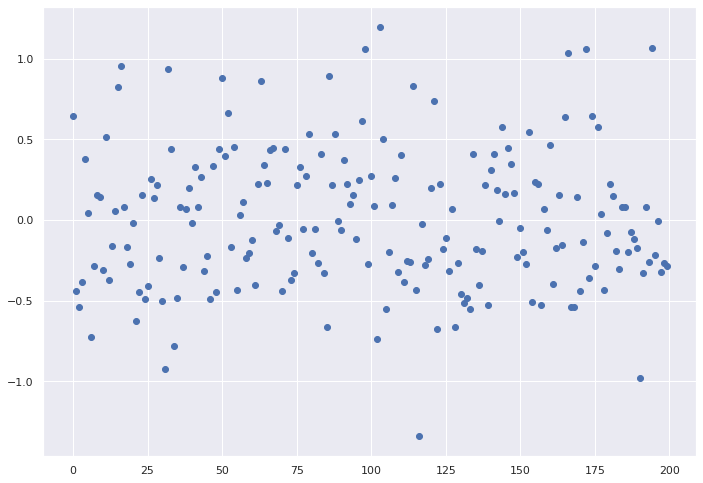

In [27]:
x_vals = sub_set.drop(['Content Rating', 'Installs'], 1).to_numpy()
y = sub_set['Installs'].to_numpy()
y_cova = reg.predict(x_vals)

plt.scatter(range(len(y)), y_cova - y)

<div dir=rtl>
<h4>
◊†◊ô◊™◊ü ◊ú◊®◊ê◊ï◊™ ◊õ◊ô ◊î◊û◊ï◊ì◊ú ◊©◊ú◊†◊ï ◊ó◊°◊® ◊î◊ò◊ô◊î (◊î◊†◊ó◊™ ◊î◊ú◊ô◊†◊ê◊®◊ô◊ï◊™ ◊î◊í◊ô◊ï◊†◊ô◊™) ◊ï◊õ◊ô ◊ê◊§◊©◊® ◊ú◊î◊†◊ô◊ó ◊©◊î◊©◊ï◊†◊ï◊ô◊ï◊™ ◊ß◊ë◊ï◊¢◊ï◊™.
</h4>
</div>

<div dir=rtl>
<h4>
9. ◊†◊ì◊í◊ï◊ù ◊û◊ì◊í◊ù ◊û◊ß◊®◊ô ◊©◊ú 1000 ◊†◊ß◊ï◊ì◊ï◊™:
</h4>
</div>

In [28]:
rows = np.random.choice(np.setdiff1d(ln_reg_df.index.values, sub_set.index.values), 1000)
test_set = ln_reg_df.loc[rows]
test_set.head()

Rating   Reviews Content Rating  Installs  Everyone  Teen  \
4010      2.0  1.380211       Everyone   3.00000         1     0   
6892      4.2  5.392178           Teen   6.00000         0     1   
10727     4.1  2.346353       Everyone   4.69897         1     0   
1342      4.5  5.367809       Everyone   6.69897         1     0   
10147     4.1  2.726727       Everyone   5.00000         1     0   

       Everyone 10+  Mature 17+  Adults only 18+  Unrated  
4010              0           0                0        0  
6892              0           0                0        0  
10727             0           0                0        0  
1342              0           0                0        0  
10147             0           0                0        0

<div dir=rtl>
<h4>
◊†◊ó◊©◊ë ◊ê◊™ ◊î◊§◊®◊ì◊ô◊ß◊¶◊ô◊î ◊ï◊ê◊™ ◊®◊ï◊ï◊ó◊ô ◊î◊™◊ó◊ñ◊ô◊™ ◊¢◊ú ◊°◊ò ◊î◊û◊ë◊ó◊ü ◊ï◊†◊û◊¶◊ê ◊ê◊™ ◊ê◊ó◊ï◊ñ ◊î◊ú◊ô◊ô◊ë◊ú◊ô◊ù ◊©◊†◊§◊ú◊ï ◊ë◊™◊ï◊ö ◊®◊ï◊ï◊ó ◊î◊°◊û◊ö:
</h4>
</div>

In [29]:
x_vals = test_set.drop(['Content Rating', 'Installs'], 1).to_numpy()
y = test_set['Installs'].to_numpy()
y_cova = reg.predict(x_vals)
x_vals = np.array([np.insert(x, 1, 0) for x in x_vals])


count = 0

for i in range(len(y)):
  if y_cova[i] - dist.norm.ppf(0.95, 0, 1)*eps_sigma*math.sqrt(1 - x_vals[i].T.dot(c).dot(x_vals[i])) <= y[i] <= \
          y_cova[i] + dist.norm.ppf(0.95, 0, 1)*eps_sigma*math.sqrt(1 - x_vals[i].T.dot(c).dot(x_vals[i])):
    count += 1

print('Percentage Of Hits', 100*count/len(y), '%')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Percentage Of Hits 53.9 %


<div dir=rtl>
<h4>
◊ô◊¶◊ê ◊õ◊ô ◊ê◊ó◊ï◊ñ ◊®◊ï◊ï◊ó◊ô ◊î◊°◊û◊ö ◊î◊û◊õ◊ô◊ú◊ô◊ù ◊ê◊™ ◊î◊¢◊®◊ö ◊î◊ê◊û◊ô◊™◊ô ◊î◊ï◊ê ◊†◊û◊ï◊ö ◊û◊ê◊ï◊ì (54 ◊ê◊ó◊ï◊ñ) ◊ï◊õ◊ú◊ú ◊ú◊ê ◊ß◊®◊ï◊ë ◊ú - 95%. ◊î◊û◊°◊ß◊†◊î ◊©◊ú◊ï ◊û◊õ◊ö ◊î◊ô◊ê ◊©◊û◊ï◊ì◊ú ◊©◊ú◊†◊ï ◊ú◊ê ◊û◊ô◊ô◊¶◊í ◊ê◊™ ◊î◊†◊ï◊™◊ï◊†◊ô◊ù ◊ë◊¶◊ï◊®◊î ◊ò◊ï◊ë◊î ◊õ◊ú◊ú.
</h4>
</div>

<div dir=rtl>
<h4>
10. ◊†◊ï◊°◊ô◊£ ◊ú◊û◊ï◊ì◊ú ◊ê◊ô◊ë◊® ◊ê◊ô◊†◊ò◊®◊ß◊¶◊ô◊î ◊û◊°◊ì◊® ◊®◊ê◊©◊ï◊ü:
</h4>
</div>

In [30]:
ln_int = sub_set.copy()
ln_int['x1dotx2'] = sub_set['Reviews'] * sub_set['Rating']
ln_int.head()

Rating   Reviews Content Rating  Installs  Everyone  Teen  Everyone 10+  \
7499     4.1  1.785330       Everyone   3.00000         1     0             0   
3588     3.7  3.696880       Everyone   6.00000         1     0             0   
4030     4.2  1.301030       Everyone   3.69897         1     0             0   
4719     4.2  1.462398       Everyone   3.69897         1     0             0   
289      4.2  4.667500       Everyone   6.00000         1     0             0   

      Mature 17+  Adults only 18+  Unrated    x1dotx2  
7499           0                0        0   7.319852  
3588           0                0        0  13.678457  
4030           0                0        0   5.464326  
4719           0                0        0   6.142072  
289            0                0        0  19.603499

<div dir=rtl>
<h4>
◊†◊ë◊¶◊¢ ◊®◊í◊®◊°◊ô◊î ◊ú◊ô◊†◊ê◊®◊ô◊™:
</h4>
</div>

In [31]:
x_vals_int = ln_int.drop(['Content Rating', 'Installs'], 1).to_numpy()

reg_int = linear_model.LinearRegression()
reg_int.fit(x_vals_int, ln_int['Installs'].to_numpy())
beta_cova_int = reg_int.intercept_ + reg_int.coef_

con_rat_vals = ln_reg_df['Content Rating'].unique()
print(tabulate([['Effect'] + list(beta_cova)], headers=[' ', 'Bias', 'Rating', 'Reviews'] + list(con_rat_vals)))

           Bias    Rating    Reviews    Everyone     Teen    Everyone 10+    Mature 17+    Adults only 18+
------  -------  --------  ---------  ----------  -------  --------------  ------------  -----------------
Effect  2.47141   3.64796    2.84548     2.84237  2.41025         2.67144       2.69238            2.69238


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<div dir=rtl>
<h4>
◊¢◊ú ◊û◊†◊™ ◊ú◊î◊©◊ï◊ï◊ê◊™ ◊ë◊ô◊ü ◊î◊û◊ï◊ì◊ú◊ô◊ù ◊†◊ó◊©◊ë ◊¶◊ô◊ï◊†◊ô◊ù ◊ú◊û◊ï◊ì◊ú:
</h4>
</div>

In [32]:
def AIC(ll,s_size):
  return ll - s_size
def BIC(ll,s_size,n):
  return ll - (s_size*np.log(n))/2

In [33]:
x_vals = sub_set.drop(['Content Rating', 'Installs'], 1).to_numpy()

y1 = sub_set['Installs']
y1_cova = reg.predict(x_vals)
n = len(y1)
erorr = y1 - y1_cova
sigma = np.std(erorr)
f1 = np.log(((0.5*math.pi*(sigma**2))**(n/2))*np.exp(-1*(np.dot(erorr.T, erorr)))/2*(sigma**2))

y2 = ln_int['Installs']
y2_cova = reg_int.predict(x_vals_int)
erorr = y1 - y1_cova
sigma = np.std(erorr)
f2 = np.log(((0.5*math.pi*(sigma**2))**(n/2))*np.exp(-1*(np.dot(erorr.T, erorr)))/2*(sigma**2))

print('AIC For The First Model: ', f1 - len(beta_cova))
print('AIC For The Second Model: ', f2 - len(beta_cova_int))

print('BIC For The First Model: ', f1 - (len(beta_cova)*np.log(n))/2)
print('BIC For The Second Model: ', f2 - (len(beta_cova_int)*np.log(n))/2)

AIC For The First Model:  -169.89146388773827
AIC For The Second Model:  -170.89146388773827
BIC For The First Model:  -183.0847333539304
BIC For The Second Model:  -185.73389203720444


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<div dir=rtl>
<h4>
◊ß◊ô◊ë◊ú◊†◊ï ◊õ◊ô ◊í◊ù ◊ú◊§◊ô ◊û◊ì◊ì ◊î - AIC ◊ï◊í◊ù ◊ú◊§◊ô ◊û◊ì◊ì ◊î - BIC ◊ú◊ê ◊†◊ô◊™◊ü ◊ú◊ß◊ë◊ï◊¢ ◊û◊ô ◊î◊ï◊ê ◊î◊û◊ï◊ì◊ú ◊î◊ò◊ï◊ë ◊ô◊ï◊™◊® ◊ï◊ñ◊ê◊™ ◊û◊õ◊ô◊ï◊ï◊ü ◊©◊î◊¢◊®◊õ◊ô◊ù ◊ô◊¶◊ê◊ï ◊û◊ê◊ï◊ì ◊ß◊®◊ï◊ë◊ô◊ù.
</h4>
</div>


<div dir=rtl><h1>
◊®◊í◊®◊°◊ô◊î ◊ú◊ï◊í◊°◊ò◊ô◊™
</h1>
<h3>
1. ◊©◊ê◊ú◊™ ◊î◊ó◊ß◊® ◊î◊ô◊ô◊†◊î ◊î◊ê◊ù ◊õ◊û◊ï◊™ ◊î◊î◊ï◊®◊ì◊ï◊™,◊™◊í◊ï◊ë◊ï◊™ ,◊ì◊ô◊®◊ï◊í ◊î◊ê◊§◊ß◊ú◊¶◊ô◊î ◊ï◊î◊ê◊ù ◊î◊ê◊§◊ú◊ß◊¶◊ô◊î ◊ó◊ô◊†◊û◊ô◊™ ◊û◊©◊§◊ô◊¢◊ô◊ù ◊¢◊ú ◊î◊ê◊ù ◊î◊ê◊§◊ú◊ß◊¶◊ô◊î ◊¢◊ï◊ì◊õ◊†◊î ◊ú◊ê◊ó◊®◊ï◊†◊î
<br>
◊ë◊ì◊ï◊û◊î ◊ú◊ó◊ú◊ß ◊î◊®◊ê◊©◊ï◊ü ◊†◊ë◊¶◊¢ ◊ò◊®◊†◊°◊§◊ï◊û◊¶◊ô◊ï◊™ ◊¢◊ú ◊°◊ò ◊î◊†◊™◊ï◊†◊ô◊ù. ◊õ◊ê◊ü ◊ë◊†◊ï◊°◊£, ◊†◊û◊ô◊® ◊ê◊™ ◊¢◊û◊ï◊ì◊™ ◊î◊í◊ï◊ì◊ú ◊úfloat ◊ï◊†◊û◊ô◊® ◊û◊û◊í◊î ◊ë◊ô◊ô◊ò ◊ú◊ß◊ô◊ú◊ï ◊ë◊ô◊ô◊ò ◊ï◊†◊ï◊®◊ô◊ì ◊ê◊™ ◊î◊®◊©◊ï◊û◊ï◊™ ◊ë◊î◊ü ◊î◊í◊ï◊ì◊ú ◊ê◊ô◊†◊ï ◊ß◊ë◊ï◊¢. 
</div>


In [34]:
df = pd.read_csv("/content/googleplaystore.csv")
df = df.drop(df[(df.Type !='Paid') & (df.Type !='Free')].index)
df = df.dropna()
isFree_Data = df.Type.apply(lambda x: True if x=='Free' else False)
df.insert(7,'IsFree',isFree_Data)
df = df.drop('Type', 1)
df['Last Updated'] = df['Last Updated'].str.replace(',', '')
Last_Updated=pd.to_datetime(df['Last Updated'], format='%B %d %Y')
df = df.drop('Last Updated',axis=1)
df.insert(9,'Last Updated',Last_Updated)
recntly = df['Last Updated'].map(lambda x: True if x > datetime.date(2018,6,1) else False)
df.insert(9,'Recntly Updated',recntly)
df['Installs'] = df['Installs'].map(lambda s: int(s[:-1].replace(',', '')))
df = df[df['Size'] !='Varies with device']
df['Size'] = df['Size'].map(lambda x: float(x.split('k')[0]) if 'k' in x else float(x.split('M')[0])*1024 )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


<div dir=rtl>
◊ë◊©◊ú ◊°◊ô◊ë◊ï◊™ ◊©◊î◊ï◊ì◊í◊û◊ï ◊ë◊ó◊ú◊ß ◊î◊®◊ê◊©◊ï◊ü ◊†◊ë◊¶◊¢ ◊ú◊ï◊í10 ◊¢◊ú ◊î◊ï◊®◊ì◊ï◊™ ◊ï◊™◊í◊ï◊ë◊ï◊™, ◊ï◊ë◊†◊ï◊°◊£ ◊†◊î◊§◊ï◊ö ◊ê◊™ ◊¢◊ï◊ì◊õ◊ü ◊ú◊ê◊ó◊®◊ï◊†◊î ◊ï◊î◊ê◊ù ◊î◊ê◊§◊ú◊ß◊¶◊ô◊î ◊ó◊ô◊†◊û◊ô◊™ ◊ú◊¢◊®◊õ◊ô◊ù ◊ë◊ô◊†◊ê◊®◊ô◊ù.

In [35]:
ln_reg_df = df
ln_reg_df['Installs'] = ln_reg_df['Installs'].map(lambda x: np.log10(int(x)))
ln_reg_df['Reviews'] = ln_reg_df['Reviews'].map(lambda x: np.log10(int(x)))
ln_reg_df['Recntly Updated'] = ln_reg_df['Recntly Updated'].map(lambda x: 1 if x else 0) 
ln_reg_df['IsFree'] = ln_reg_df['IsFree'].map(lambda x: 1 if x else 0) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<div dir=rtl><h3>
2. ◊õ◊¢◊™ ◊†◊ë◊ó◊® ◊û◊ì◊í◊ù ◊ë◊í◊ï◊ì◊ú 200 ◊ú◊î◊û◊©◊ö ◊î◊¢◊ë◊ï◊ì◊î:

In [36]:
sample = ln_reg_df.sample(n=200,random_state=7).reset_index(drop = True)
sample.head()

App  Category  Rating  \
0                                  learn c in hindi    FAMILY     4.3   
1        Dr. Truck Driver : Real Truck Simulator 3D    FAMILY     4.1   
2                                    U-Craft Mobile    FAMILY     4.2   
3  Resume Builder - Curriculum Vitae & Resume Maker  BUSINESS     4.0   
4                                             Rider      GAME     4.5   

    Reviews     Size  Installs  IsFree Price Content Rating  Recntly Updated  \
0  2.037426   2764.8   3.69897       1     0       Everyone                0   
1  3.211121  98304.0   5.00000       1     0   Everyone 10+                1   
2  4.057057  30720.0   5.00000       1     0       Everyone                0   
3  1.079181   8294.4   3.69897       1     0       Everyone                1   
4  5.816286  73728.0   7.00000       1     0           Teen                0   

  Last Updated      Genres Current Ver   Android Ver  
0   2017-06-24   Education         4.1    4.0 and up  
1   2018-07-05  Simulation         1.8    4.1 and up  
2   2017-09-11    Strategy      1.0.14  4.0.3 and up  
3   2018-06-07    Business         1.9  4.0.3 and up  
4   2017-07-17      Arcade       1.2.1  4.0.3 and up

<div dir=rtl><h3>
3.◊ê. ◊†◊†◊™◊ó ◊ê◊™ Recntly Updated ◊ïIsFree ◊©◊õ◊ü ◊ê◊ú◊ï ◊î◊û◊©◊™◊†◊ô◊ù ◊ë◊î◊ù ◊ú◊ê ◊î◊©◊™◊û◊©◊†◊ï ◊ë◊ó◊ú◊ß ◊î◊®◊ê◊©◊ï◊ü.

In [37]:
last_Updated = len(sample[sample['Recntly Updated']== True])
not_last_updated = len(sample[sample['Recntly Updated']== False])
per_Updated = str(100*last_Updated/(not_last_updated+last_Updated))+'%'
per_not_Updated = str(100*not_last_updated/(not_last_updated+last_Updated))+'%'

column_names = [' ', 'Recntly Updated',"Didn't Recntly Updated"]
print(tabulate([['Total'] + [last_Updated,not_last_updated],['Percentge'] + [per_Updated,per_not_Updated]],headers=column_names))

           Recntly Updated    Didn't Recntly Updated
---------  -----------------  ------------------------
Total      85                 115
Percentge  42.5%              57.5%


<div dir=rtl><h3>
◊†◊©◊ô◊ù ◊ú◊ë ◊õ◊ô ◊î◊î◊™◊§◊ú◊í◊ï◊ô◊ï◊™ ◊©◊ú ◊î◊ê◊§◊ß◊ú◊¶◊ô◊ï◊™ ◊©◊¢◊ï◊ì◊õ◊†◊ï ◊ú◊ê◊ó◊®◊ï◊†◊î ◊ï◊ê◊ú◊ï  ◊ï◊©◊ú◊ê ◊ß◊®◊ï◊ë◊ï◊™ ◊ê◊ó◊™ ◊ú◊©◊†◊ô◊ô◊î 

In [38]:
IsFree = len(sample[sample['IsFree']== True])
Is_not_Free = len(sample[sample['IsFree']== False])
per_Free = str(100*IsFree/(Is_not_Free+IsFree))+'%'
per_not_Free = str(100*Is_not_Free/(Is_not_Free+IsFree))+'%'

column_names = [' ', 'IsFree',"Isn't Free"]
print(tabulate([['Total'] + [IsFree,Is_not_Free],['Percentge'] + [per_Free,per_not_Free]],headers=column_names))

           IsFree    Isn't Free
---------  --------  ------------
Total      186       14
Percentge  93.0%     7.0%


<div dir=rtl><h3>
◊†◊©◊ô◊ù ◊ú◊ë ◊õ◊ô ◊î◊î◊™◊§◊ú◊í◊ï◊™ ◊©◊ú ◊î◊ê◊§◊ú◊ß◊¶◊ô◊ï◊™ ◊î◊ó◊ô◊†◊û◊ô◊ï◊™ ◊í◊ë◊ï◊î ◊û◊©◊û◊¢◊ï◊™◊ô◊™ ◊û◊î◊î◊™◊§◊í◊ú◊ï◊™ ◊©◊ú ◊î◊ê◊§◊ß◊ú◊¶◊ô◊ï◊™ ◊î◊ú◊ê ◊ó◊ô◊†◊û◊ô◊ï◊™

In [39]:
sample_expalining= sample[['Rating','Reviews','Installs','IsFree']]
df_recntly = ln_reg_df[ln_reg_df['Recntly Updated'] == 1]
df_no_recntly = ln_reg_df[ln_reg_df['Recntly Updated'] == 0]

<div dir=rtl><h3>
4. 

In [40]:
def comapre_recntly_and_not(column):
  
  plt.xlabel(column)
  plt.ylabel('Count')
  sns.violinplot(x='Recntly Updated',y=column,data = ln_reg_df)
  plt.show()

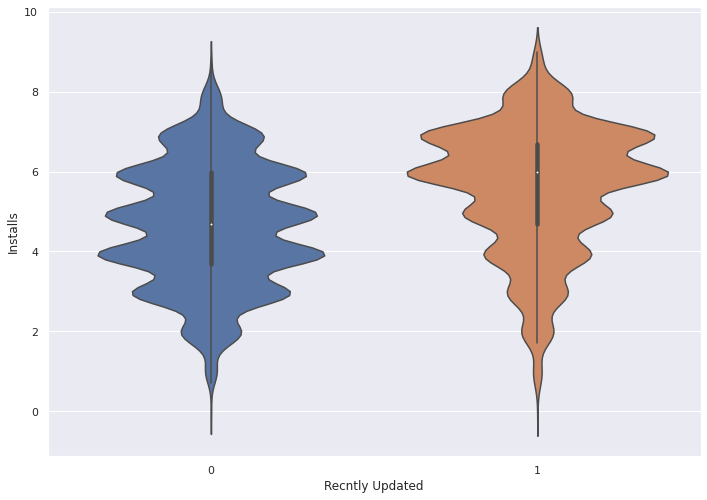

In [41]:
comapre_recntly_and_not('Installs')

<div dir=rtl><h3>
◊†◊ô◊™◊ü ◊ú◊®◊ê◊ï◊™ ◊õ◊ô ◊¢◊ë◊ï◊® ◊ê◊§◊ú◊ß◊¶◊ô◊ï◊™ ◊©◊¢◊ï◊ì◊õ◊†◊ï ◊ú◊ê◊ó◊®◊ï◊†◊î ◊ô◊© ◊ô◊ï◊™◊® ◊ê◊§◊ú◊ß◊¶◊ô◊ï◊™ ◊ë◊¢◊ú◊ï◊™ ◊û◊°◊§◊® ◊í◊ë◊ï◊î ◊©◊ú ◊î◊ï◊®◊ì◊ï◊™ ◊ë◊î◊©◊ï◊ï◊ê◊î ◊ú◊ê◊ú◊ï ◊©◊ú◊ê ◊¢◊ï◊ì◊õ◊†◊ï ◊ú◊ê◊ó◊®◊ï◊†◊î.

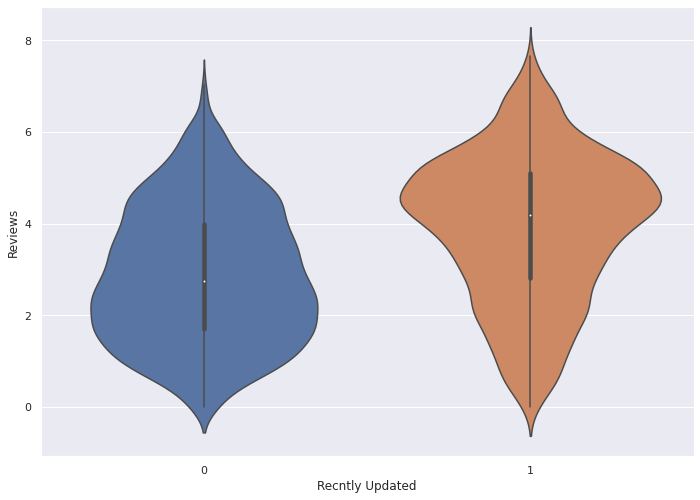

In [42]:
comapre_recntly_and_not('Reviews')

<div dir=rtl><h3>
◊†◊ô◊™◊ü ◊ú◊®◊ê◊ï◊™ ◊õ◊ô ◊ë◊ê◊ï◊§◊ü ◊ì◊ï◊û◊î ◊ú◊ê◊§◊ú◊ß◊¶◊ô◊ï◊™ ◊©◊¢◊ï◊ì◊õ◊†◊ï ◊ú◊ê◊ó◊®◊ï◊†◊î ◊ô◊© ◊û◊°◊§◊® ◊í◊ì◊ï◊ú ◊ô◊ï◊™◊® ◊©◊ú ◊ê◊§◊ú◊ß◊¶◊ô◊ï◊™ ◊ë◊¢◊ú◊ï◊™ ◊õ◊û◊ï◊™ ◊í◊ì◊ï◊ú◊î ◊©◊ú ◊™◊í◊ï◊ë◊ï◊™. ◊†◊©◊ô◊ù ◊ú◊ë ◊õ◊ô ◊™◊ï◊¶◊ê◊î ◊ñ◊ï ◊¢◊ô◊ß◊ë◊ô◊™ ◊¢◊ù ◊î◊™◊ï◊¶◊ê◊î ◊©◊ß◊ô◊ë◊ú◊†◊ï ◊ë◊ó◊ú◊ß ◊î◊®◊ê◊©◊ï◊ü ◊©◊ë◊ï ◊®◊ê◊ô◊†◊ï ◊©◊ô◊© ◊ß◊©◊® ◊ú◊ô◊†◊ê◊®◊ô ◊ô◊©◊® ◊ë◊ô◊ü ◊û◊°◊§◊® ◊î◊î◊ï◊®◊ì◊ï◊™ ◊ú◊û◊°◊§◊® ◊î◊ë◊ô◊ß◊ï◊®◊ï◊™. 

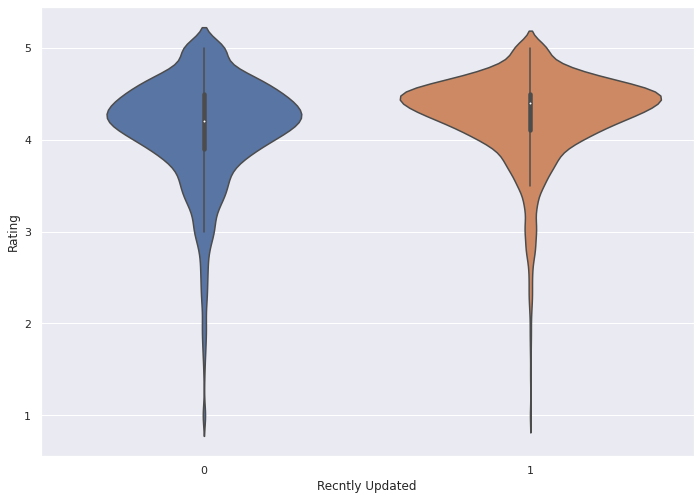

In [43]:
comapre_recntly_and_not('Rating')

<div dir=rtl><h3>
◊†◊®◊ê◊î ◊õ◊ô ◊¢◊ë◊ï◊® ◊ê◊§◊ú◊ß◊¶◊ô◊ï◊™ ◊©◊¢◊ï◊ì◊õ◊†◊ï ◊ú◊ê◊ó◊®◊ï◊†◊î ◊ô◊© ◊†◊ò◊ô◊ô◊î ◊ú◊ê◊§◊ú◊ß◊¶◊ô◊ï◊™ ◊ú◊î◊ô◊ï◊™ ◊¢◊ù ◊ì◊ô◊®◊ï◊í ◊í◊ë◊ï◊î ◊ô◊ï◊™◊®, ◊ê◊ö ◊î◊™◊¶◊ê◊î ◊ê◊ô◊†◊î ◊ó◊ì ◊û◊©◊û◊¢◊ô◊™ ◊õ◊™◊ï◊¶◊ê◊î ◊û◊í◊®◊£ ◊î◊ï◊ï◊ô◊ï◊ú◊ô◊ü.

<div dir=rtl><h3>
◊ë◊°◊î◊õ, ◊û◊î◊í◊®◊§◊ô◊ù ◊©◊î◊¶◊í◊†◊ï ◊†◊ô◊™◊ü ◊ú◊î◊°◊ô◊ß ◊õ◊ô ◊ú◊î◊ï◊®◊ì◊ï◊™ ◊ï◊ú◊™◊í◊ï◊ë◊ï◊™ ◊ô◊© ◊î◊©◊§◊¢◊î ◊ì◊ï◊û◊î ◊ï◊î◊ô◊ê ◊î◊í◊ë◊ï◊î◊î ◊ë◊ô◊ï◊™◊®.<br>
◊õ◊¢◊™ ◊†◊ë◊¶◊¢ ◊®◊í◊®◊°◊ô◊î ◊ú◊ï◊í◊°◊ò◊ô◊™ ◊ï◊†◊¢◊®◊ô◊ö ◊ê◊™ b^:

In [44]:
model_sample = LogisticRegression(solver='liblinear').fit(sample_expalining, sample['Recntly Updated'])

In [45]:
beta_estimation_sample = model_sample.coef_
print(beta_estimation_sample[0])

[ 0.04167591  0.80349835 -0.49129332  0.45327263]


<div dir=rtl>
<h3>
◊†◊í◊ì◊ô◊® ◊ê◊™ Œ≤^ = (Œ≤1,..,Œ≤4) ◊ïX =(x1,..x4). ◊†◊°◊™◊õ◊ú ◊¢◊ú ◊©◊ô◊†◊ï◊ô ◊ë◊ô◊ó◊ô◊ì◊î ◊ë◊ê◊ó◊ì ◊û◊î◊û◊©◊™◊†◊ô◊ù ◊ë◊ï◊ï◊ß◊ò◊ï◊® X (◊û◊©◊™◊†◊î 1 ◊ú◊ì◊ï◊í◊û◊ê) ◊ï◊†◊°◊û◊ü X_1 = (x1+1,x2,x3,x4).◊î◊û◊ï◊ì◊ú ◊û◊ï◊í◊ì◊® ◊¢◊ú ◊ô◊ì◊ô œÄ(Œ≤ * X)  ◊ï◊†◊í◊ì◊ô◊® ◊ê◊™ ◊î◊©◊ô◊†◊ï◊ô  ◊ë◊ô◊ó◊ô◊ì◊î ◊ë◊ê◊ó◊ì ◊î◊û◊©◊™◊†◊ô◊ù ◊õœÄi(Œ≤* X_i)
<br>
◊õ◊¢◊™ ◊†◊°◊™◊õ◊ú ◊¢◊ú ◊ô◊ó◊° ◊î◊ú◊ï◊í◊ô◊ù:
<br>
log((œÄ1/1-œÄ1)/(œÄ/1-œÄ)) = log(œÄ1/1-œÄ1) - log(œÄ/1-œÄ) = Œ≤*X+Œ≤1 - Œ≤*X = Œ≤1
◊ï◊ú◊õ◊ü ◊ô◊î◊ô◊î ◊©◊ô◊†◊ï◊ô e^Œ≤1 = e^0.0416=1.042

◊†◊©◊ô◊ù ◊ú◊ë ◊õ◊ô ◊¢◊ë◊ï◊® ◊õ◊ú i ◊û◊™◊ß◊ô◊ô◊ù ◊©◊î◊©◊ô◊†◊ï◊ô ◊î◊ï◊ê e^Œ≤i ◊ï◊ú◊õ◊ü ◊°◊î◊õ ◊¢◊ë◊ï◊® ◊î◊ë◊ê◊ô◊ù:

◊î◊©◊ô◊†◊ï◊ô ◊¢◊ë◊ï◊® x2 ◊î◊ï◊ê e^Œ≤2 = e^0.803= 2.23

◊î◊©◊ô◊†◊ï◊ô ◊¢◊ë◊ï◊® x3 ◊î◊ï◊ê e^Œ≤3 = e^-0.491= 0.612

◊î◊©◊ô◊†◊ï◊ô ◊¢◊ë◊ï◊® x4 ◊î◊ï◊ê e^Œ≤4 = e^0.453= 1.57

<h3>


</div>


In [46]:
def pi(beta_est,i):
  e = np.exp(np.dot(beta_est,sample_expalining.loc[i]))
  return e[0]/(1+e[0])
def sigmoid(z):
    predict_proba = 1 / (1 + np.exp(-z))
    return predict_proba

<div dir=rtl>
<h3>
5. ◊¢◊ú ◊û◊†◊™ ◊ú◊û◊¶◊ï◊ê ◊ê◊™ ◊®◊ï◊ï◊ó◊ô ◊î◊°◊û◊ö ◊¢◊ú◊ô◊†◊ï ◊ú◊ó◊©◊ë ◊ê◊™ ◊î◊©◊ï◊†◊ï◊™ ◊©◊ú ◊î◊ê◊ï◊û◊ì ◊ï◊¢◊ú ◊õ◊ü ◊†◊ó◊©◊ë◊î ◊¢◊ú ◊ô◊ì◊ô   VAR(Œ≤^) = (XtVX)^-1 ◊õ◊ê◊©◊®:



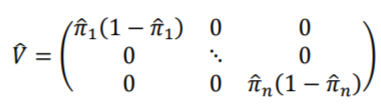

In [47]:
val = [pi(beta_estimation_sample,i)*(1-pi(beta_estimation_sample,i)) for i in range(200)]
V = np.diag(val)

In [48]:
corr_beta = fractional_matrix_power(np.dot(np.dot(np.transpose(sample_expalining),V),sample_expalining),-1) 
vars = [corr_beta[i][i] for i in range(corr_beta.shape[0])]
for i in range(4):
  print('The varience of beta-'+ str(i) + ' is '+ str(vars[i]))

The varience of beta-0 is 0.021465819634470758
The varience of beta-1 is 0.08544671401285384
The varience of beta-2 is 0.08246463393263657
The varience of beta-3 is 0.3657375208479603


<div dir=rtl>
<h3>
◊õ◊¢◊™ ◊†◊ó◊©◊ë ◊ê◊™ ◊®◊ï◊ï◊ó◊ô ◊î◊°◊û◊ö ◊õ◊§◊ô ◊©◊†◊ú◊û◊ì ◊ë◊õ◊ô◊™◊î:
<h3>


</div>


In [49]:
list_ranges= []
for i in range(corr_beta.shape[0]):
  print('Confidence Interval For Coefficient Number ', i, ': [', beta_estimation_sample[0][i] - 2*corr_beta[i][i], ', ',  beta_estimation_sample[0][i] + 2*corr_beta[i][i], ']')
  list_ranges.append([beta_estimation_sample[0][i] - 2*corr_beta[i][i],  beta_estimation_sample[0][i] + 2*corr_beta[i][i]])

Confidence Interval For Coefficient Number  0 : [ -0.001255728077461167 ,  0.08460755046042187 ]
Confidence Interval For Coefficient Number  1 : [ 0.6326049247926064 ,  0.9743917808440219 ]
Confidence Interval For Coefficient Number  2 : [ -0.6562225917786132 ,  -0.32636405604806684 ]
Confidence Interval For Coefficient Number  3 : [ -0.27820241413825264 ,  1.1847476692535885 ]


<div dir=rtl>
<h3>
 ◊õ◊¢◊™ ◊†◊ë◊¶◊¢ ◊®◊í◊®◊°◊ô◊î ◊ú◊ï◊í◊ô◊°◊ò◊ô◊™ ◊¢◊ú ◊î◊û◊ì◊í◊ù ◊î◊û◊ß◊ï◊®◊ô:
<h3>


</div>


In [50]:
model = LogisticRegression(solver='liblinear').fit(ln_reg_df[['Rating','Reviews','Installs','IsFree']], ln_reg_df['Recntly Updated'])
beta_estimation = model.coef_[0]

<div dir=rtl>
<h3>
◊õ◊¢◊™ ◊†◊ë◊ì◊ï◊ß ◊î◊ê◊ù ◊®◊ï◊ï◊ó◊ô ◊î◊°◊û◊ö ◊©◊î◊™◊ß◊ë◊ú◊ï ◊û◊î◊û◊ì◊í◊ù ◊î◊ß◊ò◊ü ◊û◊õ◊ô◊ú◊ô◊ù ◊ê◊™ ◊î◊ê◊ï◊û◊ì◊ô◊ù ◊¢◊ë◊ï◊® ◊õ◊ú ◊î◊û◊ì◊í◊ù:<h3>


</div>


In [51]:
explainers = ['Rating','Reviews','Installs','IsFree']
for i in range(len(beta_estimation)):
  if list_ranges[i][0]<= beta_estimation[i] and (beta_estimation[i] <= list_ranges[i][1]):
    str_in = ''
  else:
    str_in = "n't"
  print('Estimator for '+ explainers[i] + ' is'+str_in+' in the confidence interval')

Estimator for Rating isn't in the confidence interval
Estimator for Reviews isn't in the confidence interval
Estimator for Installs isn't in the confidence interval
Estimator for IsFree is in the confidence interval


<div dir=rtl>
<h3>
6. ◊†◊ï◊°◊ô◊£ ◊ê◊™ ◊î◊ê◊ô◊†◊ò◊®◊ß◊¶◊ô◊ï◊™ ◊û◊°◊ì◊® ◊®◊ê◊©◊ï◊ü:

</div>


In [52]:
columns = list(sample_expalining.columns)
sample_expalining_added_var = sample_expalining.copy()
for i,name in enumerate(columns):
  for j in range(i+1,len(columns)):
    cur = 'z_' + name +'_'+columns[j]
    sample_expalining_added_var[cur] = sample_expalining_added_var[name] * sample_expalining_added_var[columns[j]]

<div dir=rtl>
<h3>
◊†◊ë◊¶◊¢ ◊®◊í◊®◊°◊ô◊î ◊ú◊ï◊í◊°◊ò◊ô◊™ ◊¢◊ú ◊î◊û◊ì◊í◊ù ◊î◊ó◊ì◊©:
</div>


In [53]:
model_added_var = LogisticRegression(solver='liblinear').fit(sample_expalining_added_var, sample['Recntly Updated'])
beta_estimation_added_var = model_added_var.coef_[0]

In [54]:
def log_likeihood(train,beta):
  log_likeihood = 0
  for index,x in train.iterrows():
    log_odds = beta @ x
    y_pred_proba = sigmoid(log_odds)
    y_actual = sample['Recntly Updated'].loc[index]
    log_likeihood += y_actual*np.log(y_pred_proba) + (1-y_actual)*np.log(1-y_pred_proba)
  return log_likeihood
reduced_ll = log_likeihood(sample_expalining,beta_estimation_sample)


<div dir=rtl>
<h3>
◊†◊©◊ï◊ï◊î ◊ë◊ô◊ü ◊î◊û◊ï◊ì◊ú◊ô◊ù ◊õ◊ê◊©◊® ◊î◊û◊ï◊ì◊ú ◊î◊û◊ú◊ê ◊î◊ï◊ê ◊î◊û◊ï◊ì◊ú ◊î◊õ◊ï◊ú◊ú ◊ê◊™ ◊î◊ê◊ô◊†◊ò◊®◊ß◊¶◊ô◊ï◊™:

</div>


In [55]:
full_ll = log_likeihood(sample_expalining_added_var,beta_estimation_added_var)
reduced_ll = log_likeihood(sample_expalining,beta_estimation_sample)
LR_statistic = -2*(reduced_ll-full_ll)
p_val = dist.chi2.sf(LR_statistic, 6)
p_val[0]

4.142064303126668e-09

<div dir=rtl>
<h3>
◊î◊¢◊®◊ö ◊ß◊ò◊ü ◊û0.05 ◊ï◊ú◊õ◊ü ◊†◊ì◊ó◊î ◊ê◊™ ◊î◊©◊¢◊®◊™ ◊î◊ê◊§◊°. ◊ï◊ú◊õ◊ü ◊î◊û◊ï◊ì◊ú ◊î◊û◊ú◊ê ◊ú◊ï◊û◊ì ◊ê◊™ ◊î◊ì◊ò◊ê ◊ë◊¶◊ï◊®◊î ◊ò◊ï◊ë◊î ◊ô◊ï◊™◊® ◊ï◊¢◊ú ◊õ◊ü ◊†◊ë◊ó◊® ◊ê◊ï◊™◊ï.
<br>
◊õ◊¢◊™ ◊†◊©◊ï◊ï◊î ◊ë◊ô◊ü ◊î◊û◊ï◊ì◊ú◊ô◊ù ◊¢◊ú ◊ô◊ì◊ô ◊©◊ô◊û◊ï◊© ◊ë◊û◊ì◊ì AIC
</div>


In [56]:
AIC_full = AIC(full_ll,10)
AIC_reuced = AIC(reduced_ll,4)

In [57]:
(AIC_full - AIC_reuced)[0]

19.137098518952342

<div dir=rtl>
<h3>
◊ï◊ú◊õ◊ü AIC ◊©◊ú ◊î◊û◊ï◊ì◊ú ◊î◊û◊ú◊ê ◊í◊ì◊ï◊ú ◊ô◊ï◊™◊® ◊ï◊¢◊ú ◊õ◊ü ◊ë◊ë◊ó◊ô◊®◊î ◊¢◊ú ◊°◊û◊ö ◊î◊û◊û◊ì ◊†◊ë◊ó◊® ◊ë◊û◊ï◊ì◊ú ◊î◊û◊ú◊ê ◊î◊û◊õ◊ô◊ú ◊ê◊™ ◊î◊û◊©◊™◊†◊ô◊ù ◊î◊†◊ï◊°◊§◊ô◊ù.
</div>

<div dir=rtl>
<h3>
7.

</div>


In [58]:
all_explainers = ['Rating','Reviews','Installs','IsFree','Size']


all_explainers_added_var = all_explainers.copy()
sample_all_expalining = sample[['Rating','Reviews','Installs','IsFree','Size']]
sample_all_expalining_added_var = sample_all_expalining.copy()
i = 0
for i,name in enumerate(all_explainers):
    for j in range(i+1,len(all_explainers)):
      cur = 'z_' + name +'_'+all_explainers[j]
      all_explainers_added_var.append(cur)
      sample_all_expalining_added_var.insert(loc = 5+i ,column=cur, value=sample_all_expalining_added_var[name] *sample_all_expalining_added_var[all_explainers[j]])
      i+=1
sample_all_expalining_added_var['Recntly Updated'] = sample['Recntly Updated']


In [59]:
import sys

def forward(sample,all_explainers,measuring):
  max = -sys.float_info.max
  attributes = []

  for i in range(len(all_explainers)):
    cur_max = max
    max_id = -1
    for k in range(len(all_explainers)):
      attributes.append(all_explainers[k])
      sample_cur = sample[sample.columns.intersection(attributes)]
      model = LogisticRegression(solver='liblinear').fit(sample_cur, sample['Recntly Updated'])
      cur_likeihood= log_likeihood(sample_cur,model.coef_[0])
      if measuring == AIC:
        cur_measuring = measuring(cur_likeihood,len(attributes))
      else:
        cur_measuring = measuring(cur_likeihood,len(attributes),sample_cur.shape[0])
      if cur_measuring > cur_max:
        cur_max = cur_measuring
        max_id = k
      attributes.remove(all_explainers[k])
    if cur_max == max:
      return attributes
    else:
      max = cur_max
      attributes.append(all_explainers[max_id])
      del all_explainers[max_id]

In [60]:
def backward(sample,all_explainers,measuring):
  attributes = all_explainers.copy()
  sample_cur = sample[sample.columns.intersection(attributes)]
  model = LogisticRegression(solver='liblinear').fit(sample_cur, sample['Recntly Updated'])
  cur_likeihood= log_likeihood(sample_cur,model.coef_[0])
  if measuring == AIC:
      min = measuring(cur_likeihood,len(attributes))
  else:
      min = measuring(cur_likeihood,len(attributes),sample_cur.shape[0])
  for i in range(len(all_explainers)):
    cur_max = min
    max_id = -1
    for k in range(len(all_explainers)):
      attributes.remove(all_explainers[k])
      sample_cur = sample[sample.columns.intersection(attributes)]
      model = LogisticRegression(solver='liblinear').fit(sample_cur, sample['Recntly Updated'])
      cur_likeihood= log_likeihood(sample_cur,model.coef_[0])
      if measuring == AIC:
        cur_measuring = measuring(cur_likeihood,len(attributes))
      else:
        cur_measuring = measuring(cur_likeihood,len(attributes),sample_cur.shape[0])
      if cur_measuring > cur_max:
        cur_max = cur_measuring
        max_id = k
      attributes.append(all_explainers[k])
    if cur_max == min:
      return attributes
    else:
      min = cur_max
      attributes.remove(all_explainers[max_id])
      del all_explainers[max_id]


In [61]:
print(forward(sample_all_expalining_added_var,all_explainers_added_var.copy(),AIC))

['z_Reviews_Size', 'z_Rating_Installs', 'z_Reviews_Installs', 'z_Rating_Size', 'z_Rating_Reviews']


In [62]:
print(backward(sample_all_expalining_added_var,all_explainers_added_var.copy(),AIC))


['Rating', 'z_Rating_Reviews', 'z_Rating_Installs', 'z_Rating_Size', 'z_Reviews_Size', 'z_IsFree_Size']


<div dir=rtl>
<h3>
◊ô◊¶◊ê◊†◊ï ◊™◊ï◊¶◊ê◊ï◊™ ◊©◊ï◊†◊ï◊™ ◊ë◊ô◊ü ◊©◊™◊ô ◊î◊©◊ô◊ò◊ï◊™, ◊õ◊ê◊©◊® ◊©◊ë◊©◊ô◊ò◊ï◊™ backward ◊ô◊© ◊ô◊ï◊™◊® ◊ê◊ò◊®◊ô◊ë◊ô◊ï◊ò◊ô◊ù ◊û◊°◊ë◊ô◊®◊ô◊ù.
</div>


In [63]:
print(forward(sample_all_expalining_added_var,all_explainers_added_var.copy(),BIC))

['z_Reviews_Size', 'z_Rating_Installs', 'z_Reviews_Installs', 'z_Rating_Size']


In [64]:
print(backward(sample_all_expalining_added_var,all_explainers_added_var.copy(),BIC))

['z_Rating_Reviews', 'z_Rating_Installs', 'z_IsFree_Size']


<div dir=rtl>
<h3>
◊ô◊¶◊ê◊ï ◊™◊ï◊¶◊ê◊ï◊™ ◊©◊ï◊†◊ï◊™, ◊¢◊ë◊ï◊® foward ◊ê◊ò◊®◊ô◊ë◊ô◊ï◊ò ◊ê◊ó◊ì ◊ô◊®◊ì.◊õ◊ô BIC "◊û◊¢◊†◊ô◊©" ◊ó◊ñ◊ß ◊ô◊ï◊™◊® ◊õ◊©◊ô◊© ◊ô◊ï◊™◊® ◊ê◊ò◊®◊ô◊ë◊ï◊ò◊ô◊ù.◊¢◊ë◊ï◊® backward ◊ô◊®◊ì◊ï 3 ◊ê◊ò◊®◊ô◊ë◊ô◊ï◊ò◊ô◊ù ◊í◊ù ◊ë◊©◊ú ◊î◊¢◊ï◊†◊© ◊î◊ó◊ñ◊ß ◊ô◊ï◊™◊® ◊©◊ú BIC ◊ú◊ê◊ò◊®◊ô◊ë◊ô◊ï◊ò◊ô◊ù ◊ë◊ô◊ó◊° ◊úAIC.
</div>
